In [1]:
import pandas as pd 
from process_bulk import ProcessBulk
import matplotlib.pyplot as plt
import seaborn as sns 
import evaluation_helpers
from process_geography import Ward, LocalAuthority 
import os 
from copy import deepcopy
import numpy as np 
from scipy import stats
import create_plots

In [2]:
pd.options.mode.copy_on_write = True
pd.set_option("future.no_silent_downcasting", True)

In [3]:
bulk_folder_name = "bulk_data"
ward_folder_name_tenure = "dc4201ew_htward"
index_sheet_name = "Cell Numbered DC Tables 3.2.xlsx"

cl_folder_name = "confidence_intervals"
cl_sheet_name = "2011censusconfidenceintervalsdec2013_tcm77-271638.xlsx"
cl_table_name = "95% CI widths (LA level)"

fig_folder_name = "figs/population_analysis/experiments/laplace"

p_cl = ProcessBulk(bulk_folder=cl_folder_name, index_sheet=cl_sheet_name)

p = ProcessBulk(bulk_folder=bulk_folder_name, index_sheet=index_sheet_name)

# Tenure by ethnic group by age - Household Reference Persons
table_name_tenure = "DC4201EW"

In [4]:
# list of ethnicities for filtering
general_ethnicities = [
    "White: Total",
    "Mixed/multiple ethnic group: Total",
    "Asian/Asian British: Total",
    "Black/African/Caribbean/Black British: Total",
    "Other ethnic group: Total",
]
detailed_ethnicities = [
    "White: English/Welsh/Scottish/Northern Irish/British",
    "White: Irish",
    "White: Gypsy or Irish Traveller",
    "White: Other White",
    "Mixed/multiple ethnic group: White and Black Caribbean",
    "Mixed/multiple ethnic group: White and Black African",
    "Mixed/multiple ethnic group: White and Asian",
    "Mixed/multiple ethnic group: Other Mixed",
    "Asian/Asian British: Indian",
    "Asian/Asian British: Pakistani",
    "Asian/Asian British: Bangladeshi",
    "Asian/Asian British: Chinese",
    "Asian/Asian British: Other Asian",
    "Black/African/Caribbean/Black British: African",
    "Black/African/Caribbean/Black British: Caribbean",
    "Black/African/Caribbean/Black British: Other Black",
    "Other ethnic group: Arab",
    "Other ethnic group: Any other ethnic group",
]

detailed_ethnicities_simplified = [
    "White: English/Welsh/Scottish/Northern Irish/British",
    "White: Irish",
    "White: Gypsy or Irish Traveller",
    "Other White",
    "White and Black Caribbean",
    "White and Black African",
    "White and Asian",
    "Mixed/multiple ethnic group: Other Mixed",
    "Indian",
    "Pakistani",
    "Bangladeshi",
    "Chinese",
    "Other Asian",
    "African",
    "Caribbean",
    "Other Black",
    "Arab",
    "Any other ethnic group",
]

# list of tenure categories for filtering
all_tenure = [
    "All categories: Tenure",
    "Owned or shared ownership: Total",
    "Owned: Owned outright",
    "Owned: Owned with a mortgage or loan or shared ownership",
    "Social rented: Total",
    "Social rented: Rented from council (Local Authority)",
    "Social rented: Other social rented",
    "Private rented or living rent free: Total",
    "Private rented: Private landlord or letting agency",
    "Private rented: Other private rented or living rent free",
]
general_tenure = [
    "Owned or shared ownership: Total",
    "Social rented: Total",
    "Private rented or living rent free: Total",
]
detailed_tenure = [
    "Owned: Owned outright",
    "Owned: Owned with a mortgage or loan or shared ownership",
    "Social rented: Rented from council (Local Authority)",
    "Social rented: Other social rented",
    "Private rented: Private landlord or letting agency",
    "Private rented: Other private rented or living rent free",
]

In [5]:
mus = [1.0, 0.5, 0.1, 0.01, 0.001, 0.0001]
epsilons = [0.001, 0.01, 0.1, 1, 3, 5, 10]
epsilons_short = [0.001, 0.01, 0.1, 1]
epsilons_shorter = [0.01, 0.1, 1]

In [6]:
column_names = ["Age", "Tenure", "EthnicGroup", "Dataset"]

dfs_ward = p.set_up(
    table_name=table_name_tenure,
    df_type="nested",
    column_names=column_names,
    num_nested_category=10,
    subfolder=ward_folder_name_tenure,
    level=6,
)
dfs_la = p.set_up(
    table_name=table_name_tenure,
    df_type="nested",
    column_names=column_names,
    num_nested_category=10,
    subfolder=ward_folder_name_tenure,
    level=5,
)

In [7]:
ward = Ward()
local_authority = LocalAuthority()
# geo lookup file is the same for region and ward
geo_lookup = ward.get_geo_lookup_ward()

In [8]:
# colorschemes from https://personal.sron.nl/~pault/#fig:scheme_bright

colors_2 = ["#DDAA33", "#BB5566"]
colors_3 = ["#004488", "#DDAA33", "#BB5566"]
colors_4 = ["#004488", "#DDAA33", "#BB5566", "#1B7837"]
colors_5 = ["#004488", "#DDAA33", "#BB5566", "#1B7837", "#EE7733"]
colors_bright = [
    "#4477AA",
    "#EE6677",
    "#228833",
    "#CCBB44",
    "#66CCEE",
    "#AA3377",
    "#BBBBBB",
]
colors_vibrant = [
    "#EE7733",
    "#0077BB",
    "#33BBEE",
    "#EE3377",
    "#CC3311",
    "#009988",
    "#BBBBBB",
]
colors_muted = [
    "#CC6677",
    "#332288",
    "#DDCC77",
    "#117733",
    "#88CCEE",
    "#882255",
    "#44AA99",
    "#999933",
    "#AA4499",
]
colors_grey = ["#EF233C", "#B7BFCC", "#8894AA", "#2B2F42"]

In [9]:
# ward codes and names of the 3 wards I have chosen for analysis
ward_codes = ["E36002358", "E36000439", "E36003322"]
ward_codes_extended = ["E36002358", "E36000439", "E36003322", "E36001940", "E36006779"]
# ward with the largest population
largest_ward = ["E36006779"]
# ward with the smallest population in England (excluding Wales)
smallest_ward = ["E36001940"]
ward_labels_large_small = ["Ennerdale (Small Ward)", "Ladywood (Large Ward)"]
ward_names_large_small = ["Ennerdale", "Ladywood"]
ward_names_diversity = [
    "Teign Valley (Low Diversity)",
    "Newport East (Medium Diversity)",
    "Nash Mills (High Diversity)",
]
ward_names = ["Teign Valley", "Newport East", "Nash Mills"]
ward_labels_extended = [
    "Teign Valley (Low Diversity)",
    "Newport East (Medium Diversity)",
    "Nash Mills (High Diversity)",
    "Ennerdale (Small Ward)",
    "Ladywood (Large Ward)",
]
ward_names_extended = [
    "Teign Valley",
    "Newport East",
    "Nash Mills",
    "Ennerdale",
    "Ladywood",
]

In [10]:
rmse_list = ["rmse_data_error", "rmse_dp", "rmse_data_error_dp"]
rmse_dp_list = ["rmse_dp", "rmse_data_error_dp"]
inc_dec_total_list = [
    "significantly_decreased_data_error",
    "significantly_increased_data_error",
    "significantly_decreased",
    "significantly_increased",
    "significantly_decreased_data_error_dp",
    "significantly_increased_data_error_dp",
    "significantly_decreased_minority",
    "significantly_increased_minority",
    "significantly_decreased_data_error_dp_minority",
    "significantly_increased_data_error_dp_minority",
    "significantly_increased_zero",
    "significantly_increased_data_error_dp_zero",
    "significantly_decreased_zero",
    "significantly_decreased_data_error_dp_zero",
    "number_ethnicities",
    "number_minorities",
    "significantly_increased_data_error_zero",
    "significantly_increased_data_error_minority",
    "significantly_decreased_data_error_zero",
    "significantly_decreased_data_error_minority",
]
population_list = ["total %", "data error %"]
population_list_dp = ["dp %", "dp data error %"]
population_numbers_list = ["PopulationNumbers", "PopulationNumbersDataError"]
population_numbers_list_dp = ["PopulationNumbersDP", "PopulationNumbersDataErrorDP"]
inc_dec_list = [
    "significantly_decreased_data_error",
    "significantly_increased_data_error",
    "significantly_increased_data_error_zero",
    "significantly_decreased_data_error_zero",
]
inc_dec_list_dp = [
    "significantly_decreased",
    "significantly_decreased_zero",
    "significantly_increased",
    "significantly_increased_zero",
    "significantly_decreased_data_error_DP",
    "significantly_increased_data_error_DP",
    "significantly_increased_data_error_DP_zero",
    "significantly_decreased_data_error_DP_zero",
]
kl_list = ["kl_divergence", "kl_divergence_data_error", "kl_divergence_data_error_dp"]
labels_wards = [
    "Teign Valley (low diversity)",
    "Newport East (medium diversity)",
    "Nash Mills (high diversity)",
]


table_features_pop = ["total", "total_dp"]
table_features_worst_case = ["largest_observed", "lowest_observed"]
table_features_pop_data_error = [
    "total",
    "total_data_error",
    "total_dp",
    "total_data_error_dp",
]

In [11]:
# reading in the confidence intervals for all local authorities
sheet_cl = p_cl.read_cl(cl_table_name)

In [12]:
df_la = local_authority.get_local_authority(dfs_la["csv_df"], geo_lookup)

In [13]:
df_ward = ward.get_ward(dfs_ward["csv_df"], geo_lookup)

Now I load the 3 wards I have chosen. 

In [14]:
filter_dict_ward = {
    "Age": ["All categories: Age"],
    "Tenure": ["All categories: Tenure"],
    "EthnicGroup": detailed_ethnicities,
}

wards = evaluation_helpers.get_filtered_df_ward_dict(
    p, ward, df_ward, ward_codes_extended, dfs_ward["lookup_df"], filter_dict_ward
)

In [15]:
experiments = evaluation_helpers.set_up_measurements_wards_repeat(
    1000,
    wards,
    df_ward,
    sheet_cl,
    "laplace",
    epsilons_short,
    delta=0,
    sensitivity=2,
    clipping=False,
    rounding=False,
)

In [16]:
experiments_clip = evaluation_helpers.set_up_measurements_wards_repeat(
    1000,
    wards,
    df_ward,
    sheet_cl,
    "laplace",
    epsilons_short,
    delta=0,
    sensitivity=2,
    clipping=True,
    rounding=False,
)
measurement_kl_divergence_df_clip = (
    evaluation_helpers.measure_kl_divergence_experiments(
        experiments_clip, ward_codes_extended, epsilons_short, mus
    )
)

In [17]:
experiments_round = evaluation_helpers.set_up_measurements_wards_repeat(
    1000,
    wards,
    df_ward,
    sheet_cl,
    "laplace",
    epsilons_short,
    delta=0,
    sensitivity=2,
    clipping=False,
    rounding=True,
)

In [18]:
experiments_clip_round = evaluation_helpers.set_up_measurements_wards_repeat(
    1000,
    wards,
    df_ward,
    sheet_cl,
    "laplace",
    epsilons_short,
    delta=0,
    sensitivity=2,
    clipping=True,
    rounding=True,
)
measurement_kl_divergence_df_clip_round = (
    evaluation_helpers.measure_kl_divergence_experiments(
        experiments_clip_round, ward_codes_extended, epsilons_short, mus
    )
)

For the following data sets, rounding is always applied as a post-processing step. 

In [19]:
experiments_clip_no_rand = evaluation_helpers.set_up_measurements_wards_repeat_no_rand(
    1000,
    wards,
    df_ward,
    sheet_cl,
    "laplace",
    epsilons_short,
    delta=0,
    sensitivity=2,
    clipping=True,
    rounding=True,
)

In [20]:
experiments_no_clip_no_rand = (
    evaluation_helpers.set_up_measurements_wards_repeat_no_rand(
        1000,
        wards,
        df_ward,
        sheet_cl,
        "laplace",
        epsilons_short,
        delta=0,
        sensitivity=2,
        clipping=False,
        rounding=True,
    )
)

In [21]:
experiments_clip_random_seed = (
    evaluation_helpers.set_up_measurements_wards_repeat_random_seed(
        1000,
        wards,
        df_ward,
        sheet_cl,
        "laplace",
        epsilons_short,
        delta=0,
        sensitivity=2,
        clipping=True,
        rounding=True,
    )
)

In [22]:
experiments_no_clip_random_seed = (
    evaluation_helpers.set_up_measurements_wards_repeat_random_seed(
        1000,
        wards,
        df_ward,
        sheet_cl,
        "laplace",
        epsilons_short,
        delta=0,
        sensitivity=2,
        clipping=False,
        rounding=True,
    )
)

In [23]:
def create_column_names(epsilons, population_list_dp):

    column_names = []

    for epsilon in epsilons:
        new_list = [s + f" {epsilon}" for s in population_list_dp]
        column_names.extend(new_list)

    return column_names

In [24]:
population_list_full = (
    create_column_names(epsilons_short, population_list_dp) + population_list
)

In [25]:
inc_dec_list_full = create_column_names(epsilons_short, inc_dec_list_dp) + inc_dec_list

In [26]:
population_numbers_list_full = (
    create_column_names(epsilons_short, population_numbers_list_dp)
    + population_numbers_list
)

In [27]:
def create_errors(population_df, column_name):
    population_df["error"] = abs(population_df["total %"] - population_df[column_name])

In [28]:
features_full = inc_dec_list_full + population_numbers_list_full

In [29]:
df_populations = evaluation_helpers.make_experiment_df_populations(
    experiments,
    ward_codes_extended,
    population_list_full,
    population_list_dp,
    inc_dec_list_full + population_numbers_list_full,
    inc_dec_list_dp + population_numbers_list_dp,
)
create_errors(df_populations, "dp %")

In [30]:
df_populations_clip = evaluation_helpers.make_experiment_df_populations(
    experiments_clip,
    ward_codes_extended,
    population_list_full,
    population_list_dp,
    inc_dec_list_full + population_numbers_list_full,
    inc_dec_list_dp + population_numbers_list_dp,
)
create_errors(df_populations_clip, "dp %")

In [31]:
df_populations_round = evaluation_helpers.make_experiment_df_populations(
    experiments_round,
    ward_codes_extended,
    population_list_full,
    population_list_dp,
    inc_dec_list_full + population_numbers_list_full,
    inc_dec_list_dp + population_numbers_list_dp,
)
create_errors(df_populations_round, "dp %")

In [32]:
df_populations_round_clip = evaluation_helpers.make_experiment_df_populations(
    experiments_clip_round,
    ward_codes_extended,
    population_list_full,
    population_list_dp,
    inc_dec_list_full + population_numbers_list_full,
    inc_dec_list_dp + population_numbers_list_dp,
)
create_errors(df_populations, "dp %")

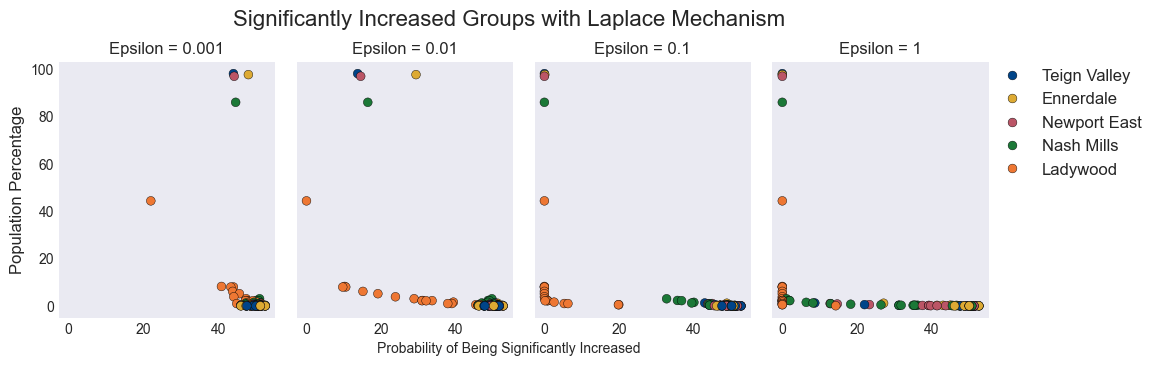

In [33]:
create_plots.population_plot_scatterplot(
    df_populations,
    "inc_frac",
    "Probability of Being Significantly Increased",
    epsilons_short,
    colors_5,
    "Significantly Increased Groups with Laplace Mechanism",
    fig_folder_name,
    "scatter_inc_laplace",
)

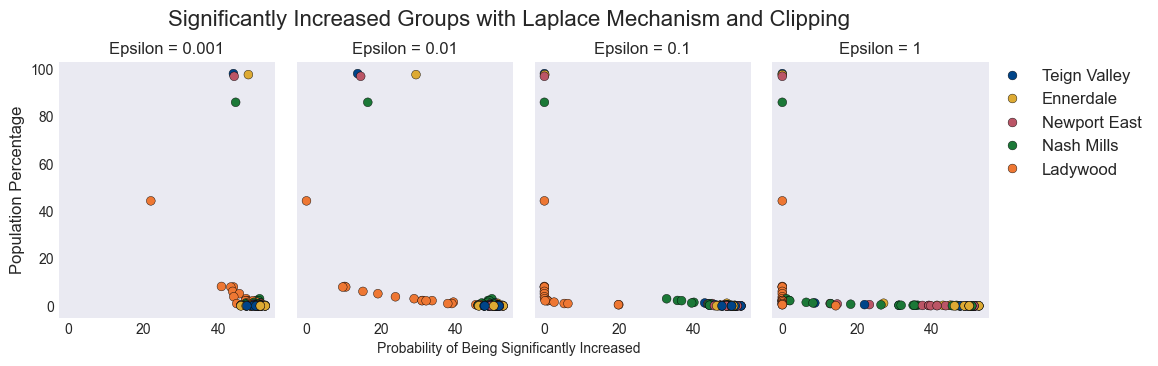

In [34]:
create_plots.population_plot_scatterplot(
    df_populations_clip,
    "inc_frac",
    "Probability of Being Significantly Increased",
    epsilons_short,
    colors_5,
    "Significantly Increased Groups with Laplace Mechanism and Clipping",
    fig_folder_name,
    "scatter_inc_laplace_clip",
)

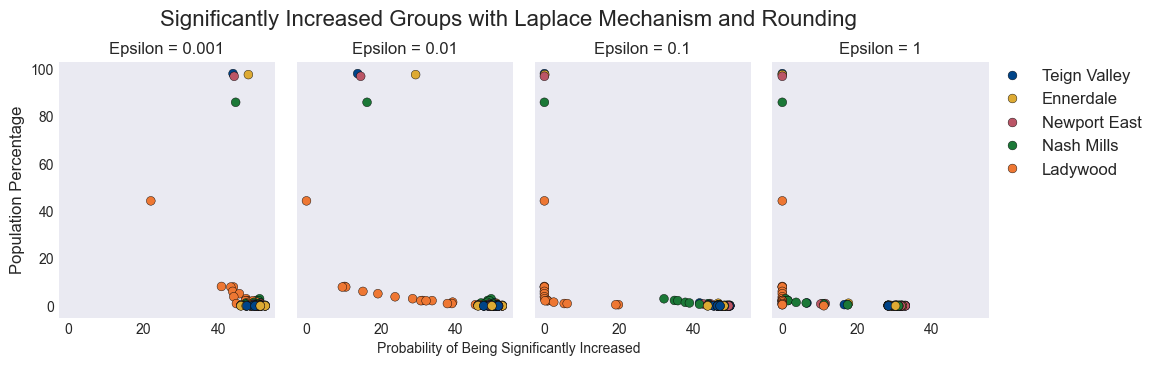

In [35]:
create_plots.population_plot_scatterplot(
    df_populations_round,
    "inc_frac",
    "Probability of Being Significantly Increased",
    epsilons_short,
    colors_5,
    "Significantly Increased Groups with Laplace Mechanism and Rounding",
    fig_folder_name,
    "scatter_inc_laplace_round",
)

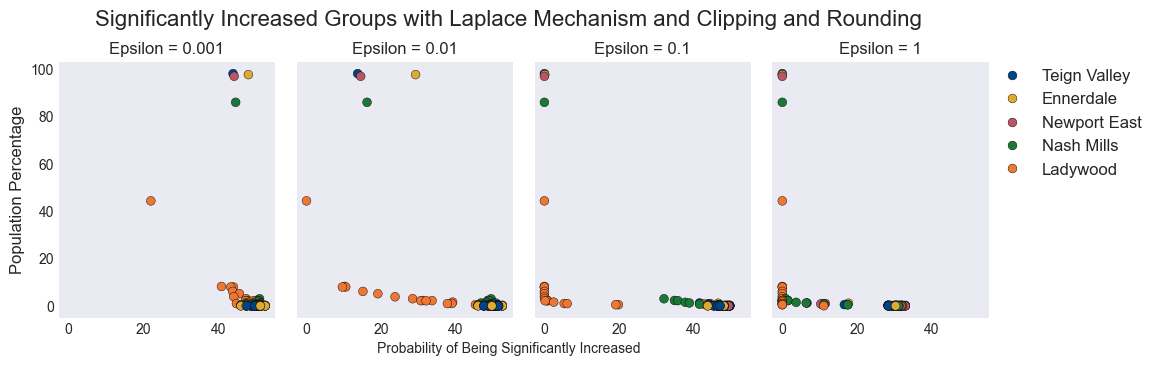

In [36]:
create_plots.population_plot_scatterplot(
    df_populations_round_clip,
    "inc_frac",
    "Probability of Being Significantly Increased",
    epsilons_short,
    colors_5,
    "Significantly Increased Groups with Laplace Mechanism and Clipping and Rounding",
    fig_folder_name,
    "scatter_inc_laplace_clip_round",
)

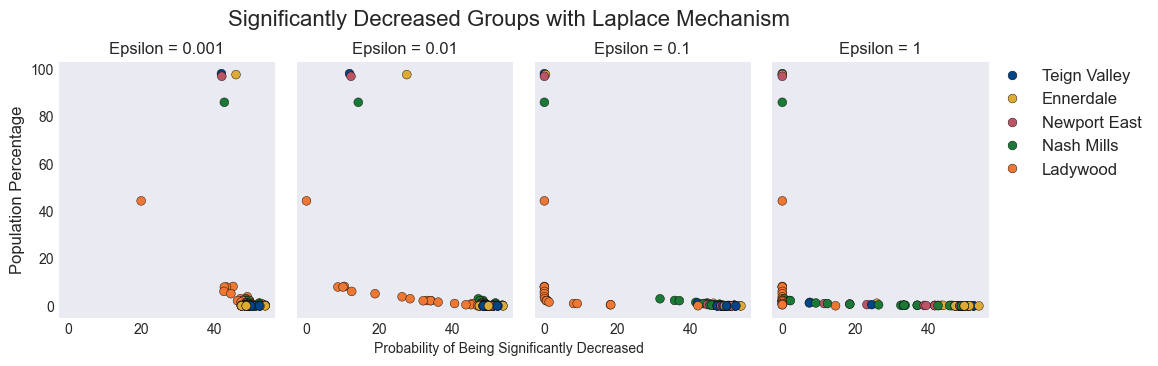

In [37]:
create_plots.population_plot_scatterplot(
    df_populations,
    "dec_frac",
    "Probability of Being Significantly Decreased",
    epsilons_short,
    colors_5,
    "Significantly Decreased Groups with Laplace Mechanism",
    fig_folder_name,
    "scatter_dec_laplace",
)

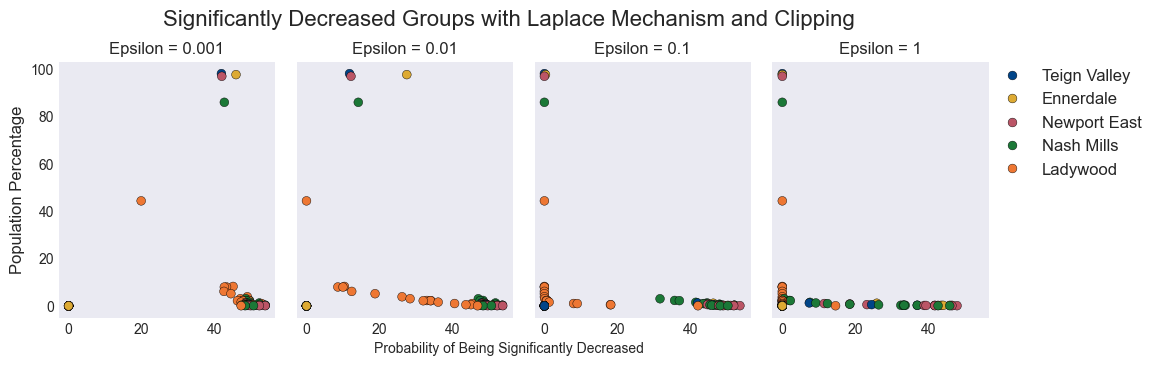

In [38]:
create_plots.population_plot_scatterplot(
    df_populations_clip,
    "dec_frac",
    "Probability of Being Significantly Decreased",
    epsilons_short,
    colors_5,
    "Significantly Decreased Groups with Laplace Mechanism and Clipping",
    fig_folder_name,
    "scatter_dec_laplace_clip",
)

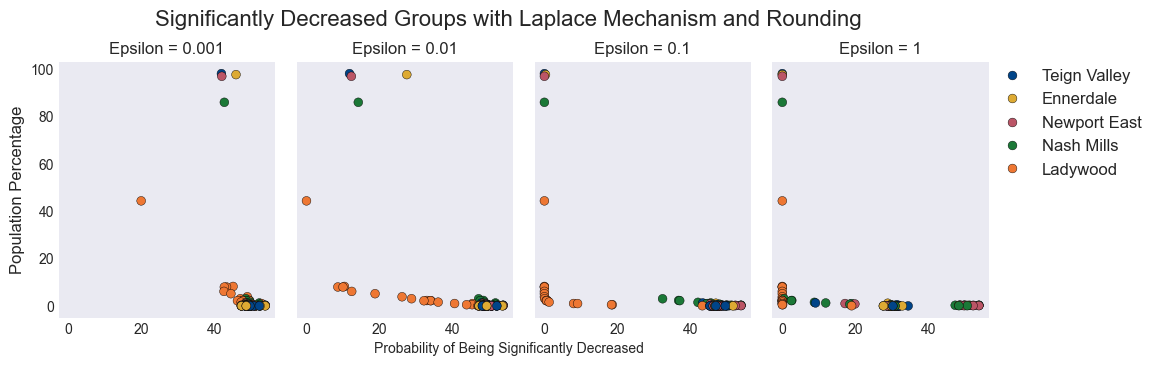

In [39]:
create_plots.population_plot_scatterplot(
    df_populations_round,
    "dec_frac",
    "Probability of Being Significantly Decreased",
    epsilons_short,
    colors_5,
    "Significantly Decreased Groups with Laplace Mechanism and Rounding",
    fig_folder_name,
    "scatter_dec_laplace_round",
)

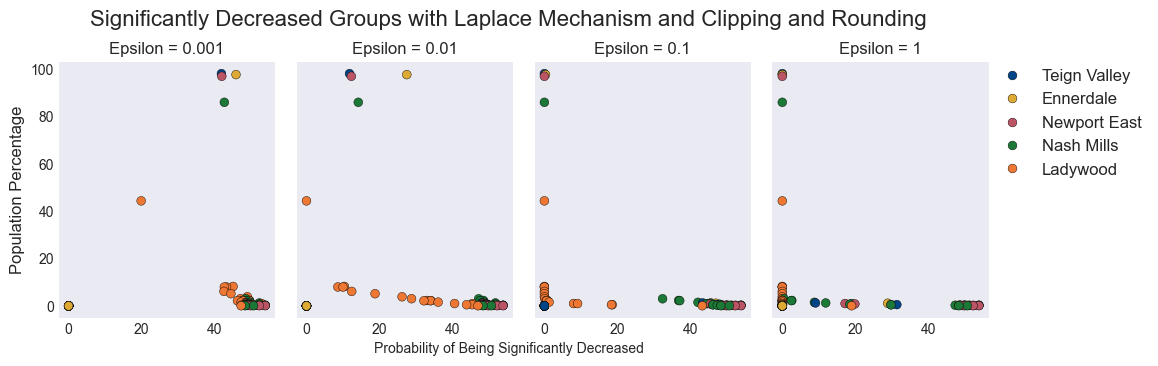

In [40]:
create_plots.population_plot_scatterplot(
    df_populations_round_clip,
    "dec_frac",
    "Probability of Being Significantly Decreased",
    epsilons_short,
    colors_5,
    "Significantly Decreased Groups with Laplace Mechanism and Clipping and Rounding",
    fig_folder_name,
    "scatter_dec_laplace_clip_round",
)

In [41]:
def population_plot_error_bars_numbers_laplace_boxen(
    df_populations,
    column_name,
    epsilons,
    ward_names,
    labels_wards,
    colors,
    fig_folder_name,
    title="",
    file_name="",
    showfliers=False,
    symlog=True,
    lineval=0,
):
    for epsilon in epsilons:

        plt.style.use("seaborn-v0_8-dark")
        fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
        df_populations.sort_values(by=["total %"], inplace=True, ascending=False)

        if symlog:
            plt.yscale("symlog")

        for i, name in enumerate(ward_names):

            area_df = df_populations.query("area_name == @name & epsilon == @epsilon")

            total = area_df.groupby(["EthnicGroup"])["PopulationNumbers"].median().sum()
            percentage = lineval / 100 * total

            sns.barplot(
                data=area_df,
                x="EthnicGroup",
                y="PopulationNumbers",
                width=1.1,
                gap=0.2,
                color=colors[0],
                linewidth=0,
                ax=axs[i],
            )
            sns.boxenplot(
                data=area_df,
                x="EthnicGroup",
                y=column_name,
                width=0.3,
                gap=0.2,
                color="black",
                fill=False,
                linewidth=0.6,
                ax=axs[i],
                flier_kws=dict(s=1.2),
                line_kws=dict(linewidth=1.3),
            )

            axs[i].tick_params(labelbottom=False)
            axs[i].tick_params(axis="y", labelsize=8)

            if lineval > 0:
                line = axs[i].axhline(
                    y=percentage, linewidth=0.9, color="black", linestyle="--"
                )
                y = line.get_ydata()[-1]
                axs[i].annotate(
                    f"{lineval}%",
                    xy=(1, y),
                    xytext=(5, 0),
                    color=line.get_color(),
                    xycoords=axs[i].get_yaxis_transform(),
                    textcoords="offset points",
                    size=10,
                    va="center",
                )

            axs[i].set_ylabel("Population Numbers")
            axs[i].set_xlabel("Population Group")
            axs[i].set_title(labels_wards[i], fontsize=12)

        fig.suptitle(
            f"Error Introduced with Laplace Mechanism with {title}Epsilon = {epsilon}",
            fontsize=16,
            y=1.0,
        )
        plt.savefig(
            (
                os.path.join(
                    fig_folder_name,
                    f"{column_name}_population_numbers_laplace_boxen{epsilon}{file_name}.png",
                )
            ),
            bbox_inches="tight",
        )
        plt.savefig(
            (
                os.path.join(
                    fig_folder_name,
                    f"{column_name}_population_numbers_laplace_boxen{epsilon}{file_name}.svg",
                )
            ),
            bbox_inches="tight",
        )

In [42]:
def population_plot_error_bars_numbers_laplace(
    df_populations,
    column_name,
    epsilons,
    ward_names,
    labels_wards,
    colors,
    fig_folder_name,
    title="",
    file_name="",
    showfliers=False,
    symlog=True,
    lineval=0,
):
    for epsilon in epsilons:

        plt.style.use("seaborn-v0_8-dark")
        fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
        df_populations.sort_values(by=["total %"], inplace=True, ascending=False)

        if symlog:
            plt.yscale("symlog")

        for i, name in enumerate(ward_names):

            area_df = df_populations.query("area_name == @name & epsilon == @epsilon")

            total = area_df.groupby(["EthnicGroup"])["PopulationNumbers"].median().sum()
            percentage = lineval / 100 * total

            sns.boxplot(
                data=area_df,
                x="EthnicGroup",
                y=column_name,
                width=0.3,
                gap=0.2,
                color="black",
                showfliers=showfliers,
                fliersize=1.2,
                fill=False,
                linewidth=0.6,
                ax=axs[i],
                medianprops={"linewidth": 1.4},
            )

            sns.barplot(
                data=area_df,
                x="EthnicGroup",
                y="PopulationNumbers",
                width=1.1,
                gap=0.2,
                color=colors[0],
                linewidth=0,
                ax=axs[i],
            )

            axs[i].tick_params(labelbottom=False)
            axs[i].tick_params(axis="y", labelsize=8)

            if lineval > 0:
                line = axs[i].axhline(
                    y=percentage, linewidth=0.9, color="black", linestyle="--"
                )
                y = line.get_ydata()[-1]
                axs[i].annotate(
                    f"{lineval}%",
                    xy=(1, y),
                    xytext=(5, 0),
                    color=line.get_color(),
                    xycoords=axs[i].get_yaxis_transform(),
                    textcoords="offset points",
                    size=10,
                    va="center",
                )

            axs[i].set_ylabel("Population Numbers")
            axs[i].set_xlabel("Population Group")
            axs[i].set_title(labels_wards[i], fontsize=12)

        fig.suptitle(
            f"Error Introduced with Laplace Mechanism with {title}Epsilon = {epsilon}",
            fontsize=16,
            y=1.0,
        )
        plt.savefig(
            (
                os.path.join(
                    fig_folder_name,
                    f"{column_name}_population_numbers_laplace_{epsilon}{file_name}.png",
                )
            ),
            bbox_inches="tight",
        )
        plt.savefig(
            (
                os.path.join(
                    fig_folder_name,
                    f"{column_name}_population_numbers_laplace_{epsilon}{file_name}.svg",
                )
            ),
            bbox_inches="tight",
        )

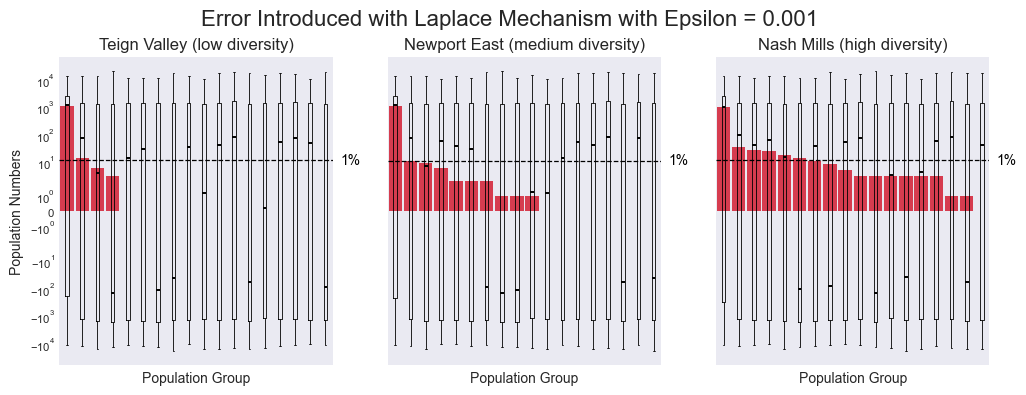

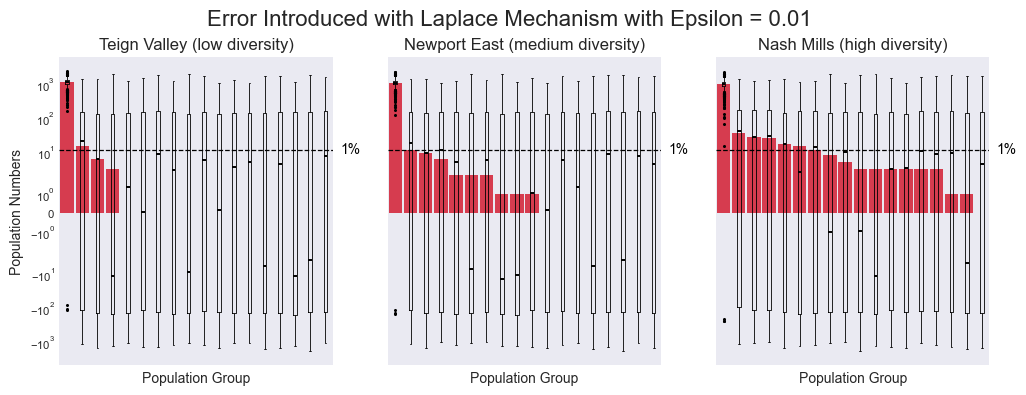

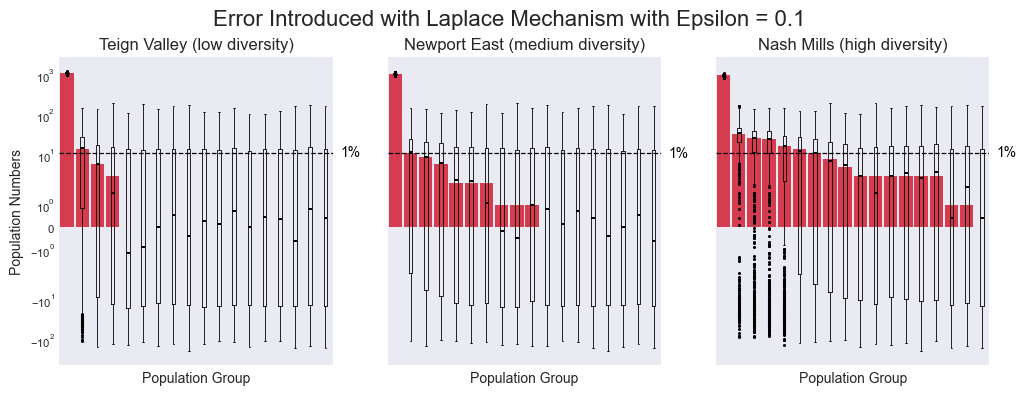

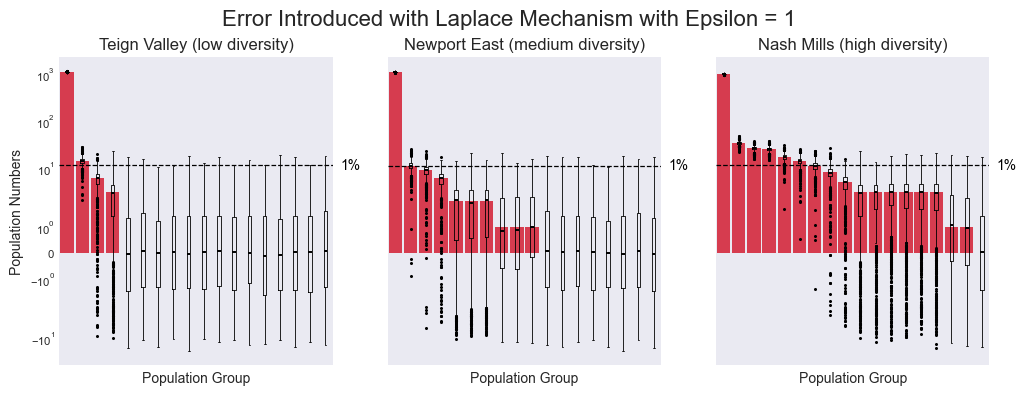

In [43]:
population_plot_error_bars_numbers_laplace(
    df_populations,
    "PopulationNumbersDP",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="",
    file_name="_line_1",
    showfliers=True,
    lineval=1,
)

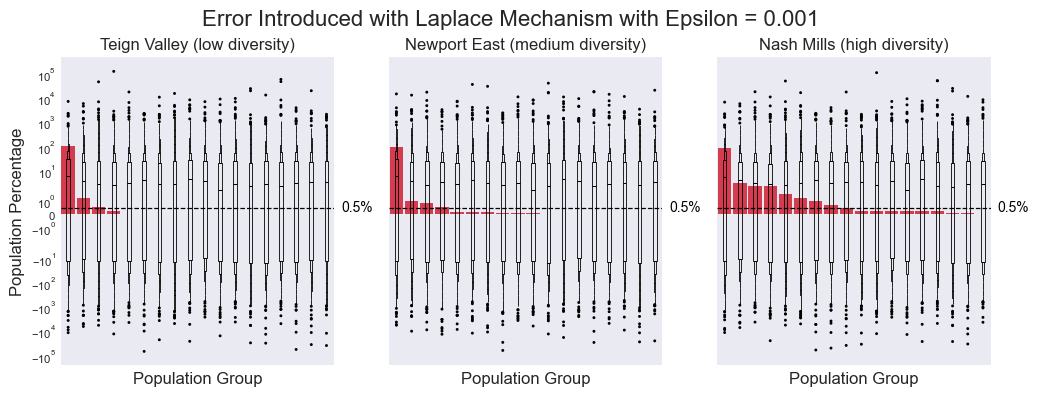

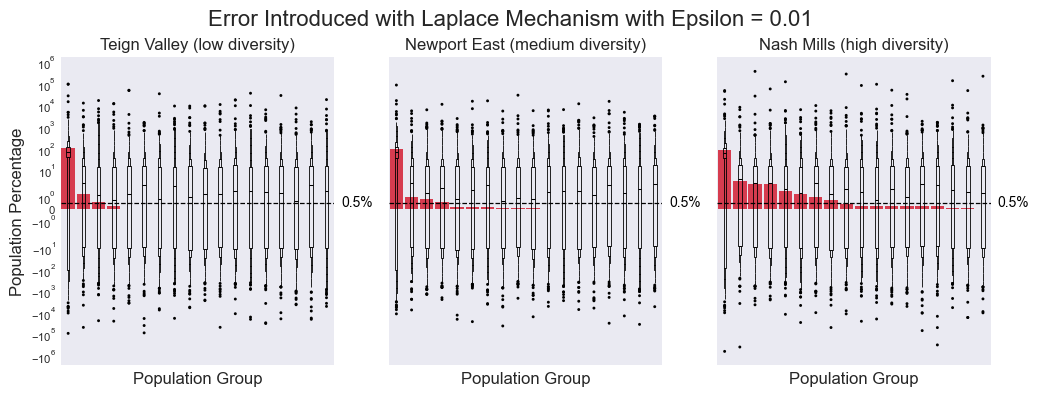

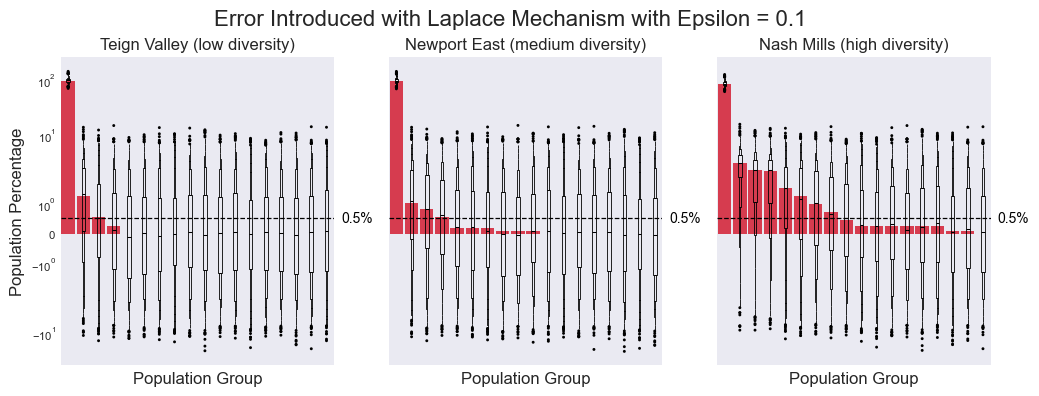

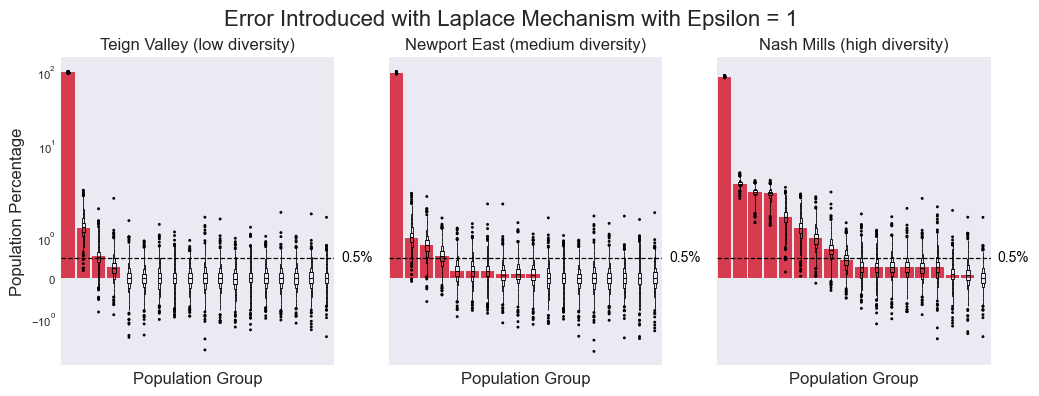

In [44]:
create_plots.population_plot_error_bars_laplace_boxen(
    df_populations,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="",
    file_name="_line_0_5",
    showfliers=True,
    lineval=0.5,
)

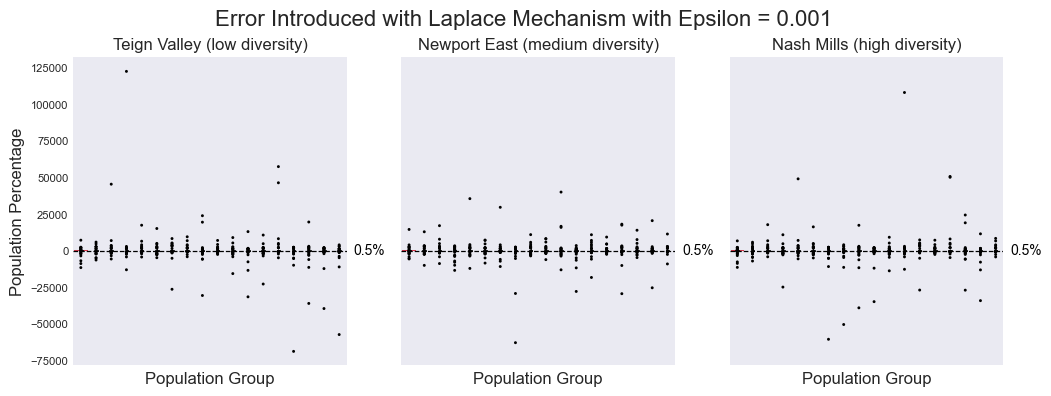

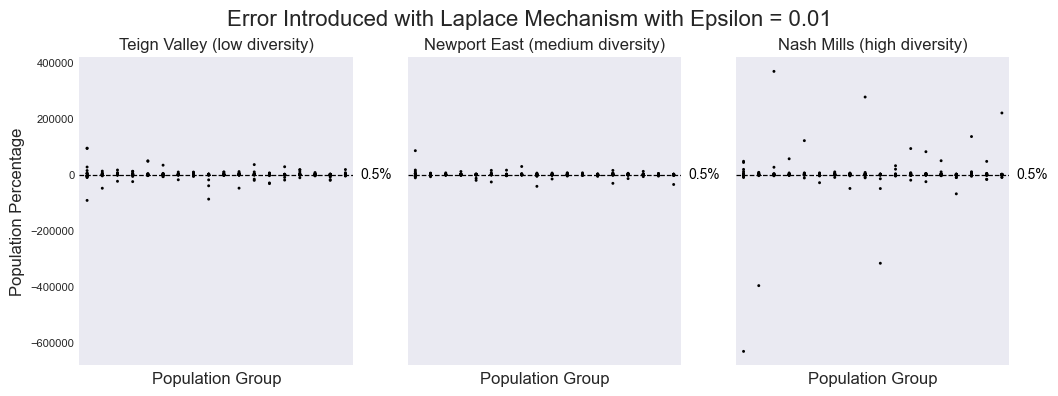

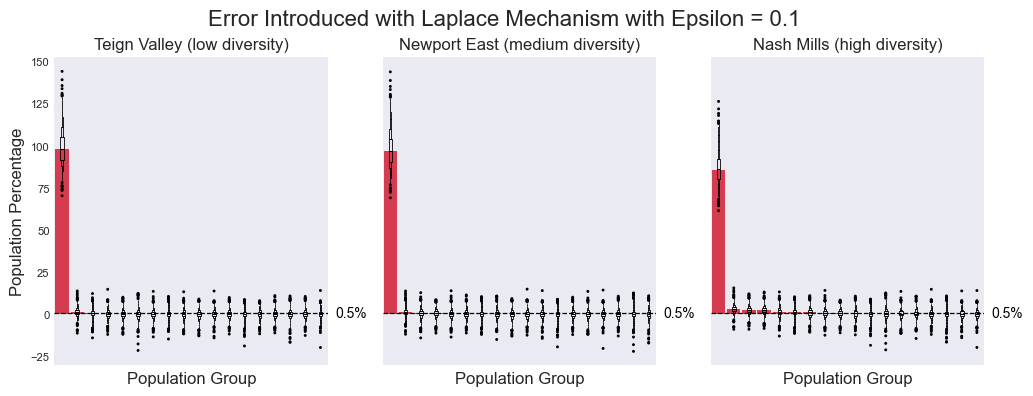

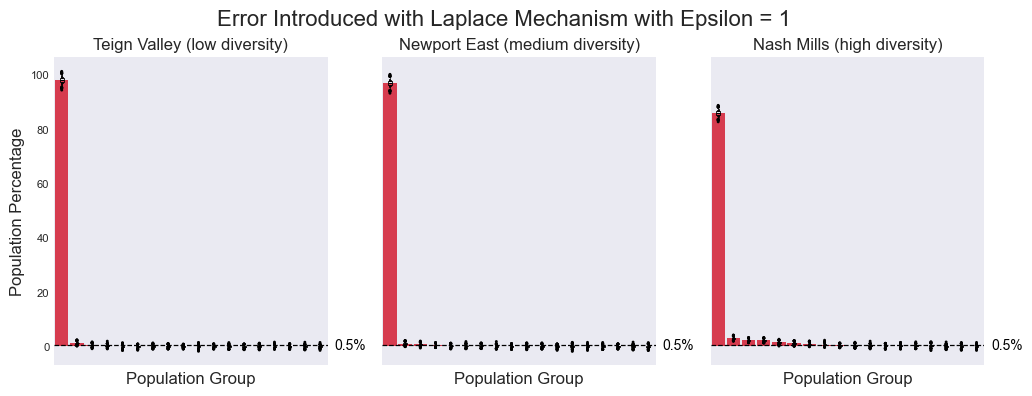

In [45]:
create_plots.population_plot_error_bars_laplace_boxen(
    df_populations,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="",
    file_name="_no_symlog_line_0_5",
    showfliers=True,
    symlog=False,
    lineval=0.5,
)

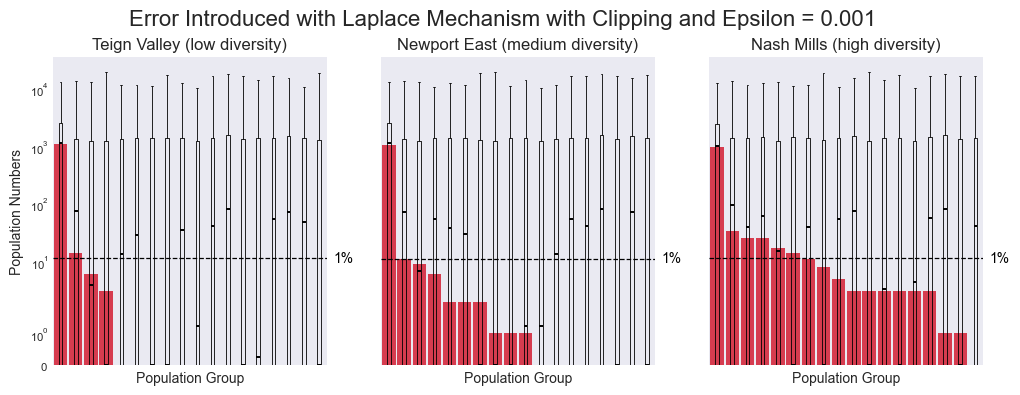

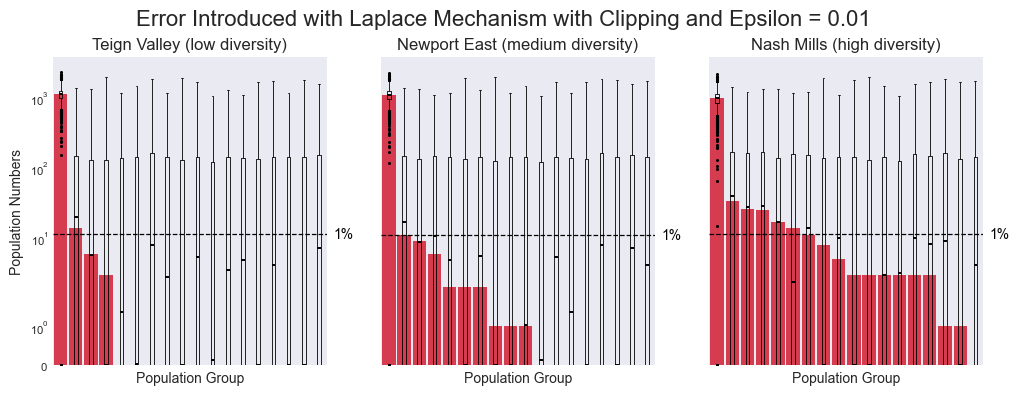

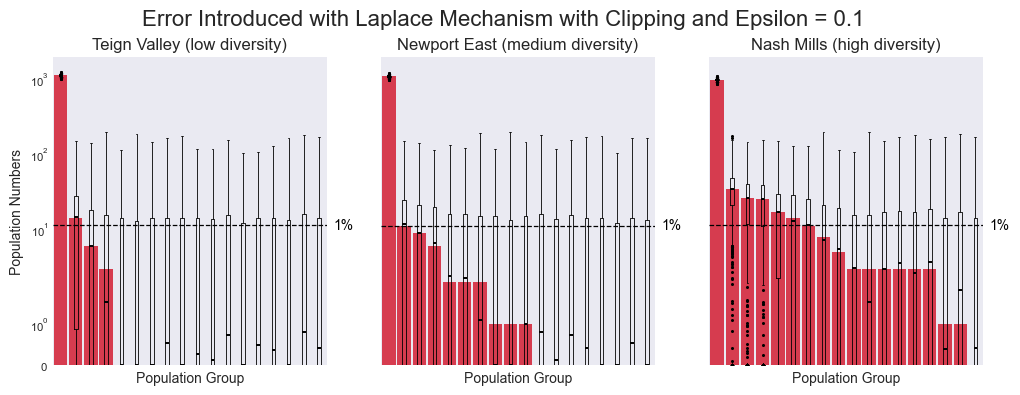

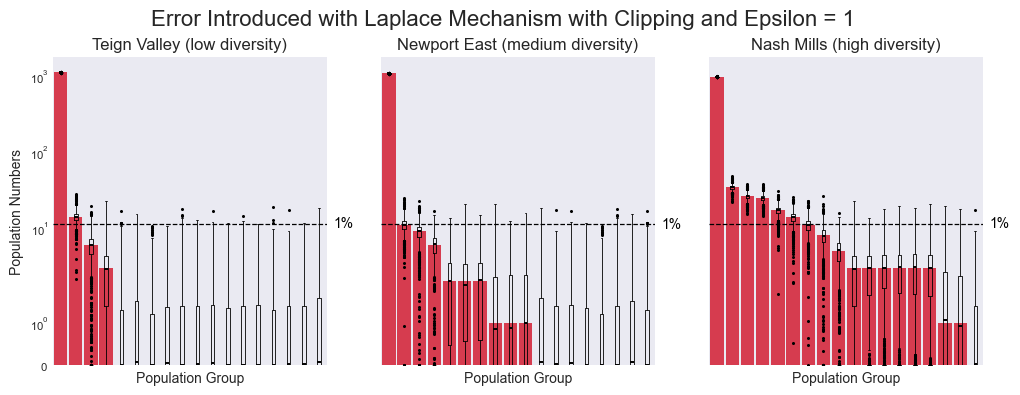

In [46]:
population_plot_error_bars_numbers_laplace(
    df_populations_clip,
    "PopulationNumbersDP",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Clipping and ",
    file_name="_clipping_line_1",
    showfliers=True,
    lineval=1,
)

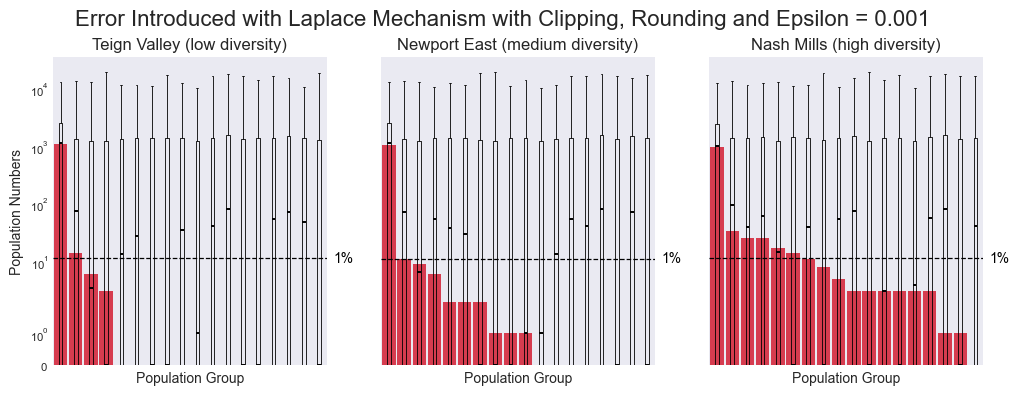

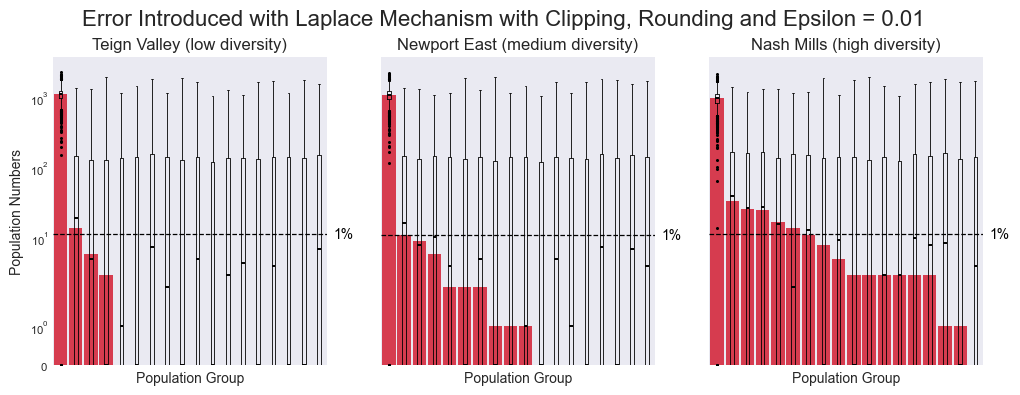

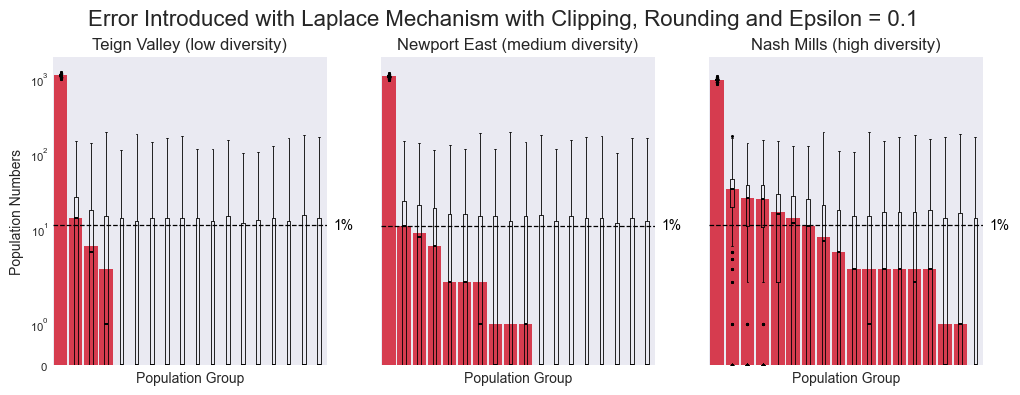

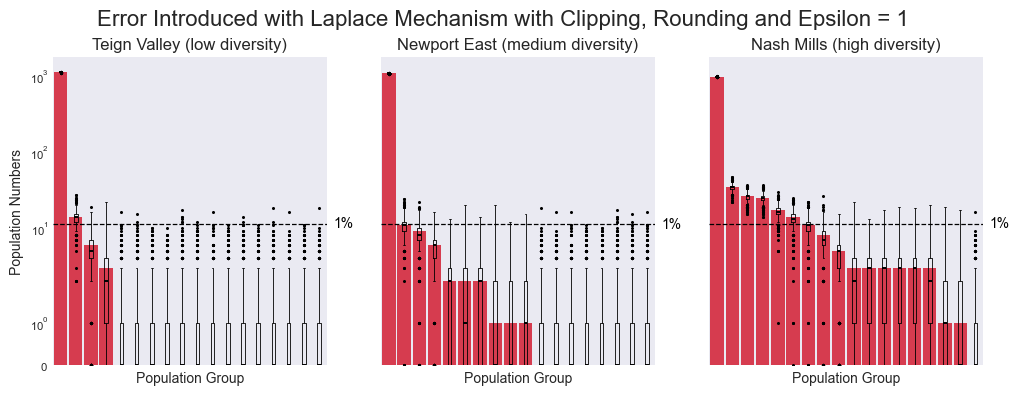

In [47]:
population_plot_error_bars_numbers_laplace(
    df_populations_round_clip,
    "PopulationNumbersDP",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Clipping, Rounding and ",
    file_name="_clipping_rounding_line_1",
    showfliers=True,
    lineval=1,
)

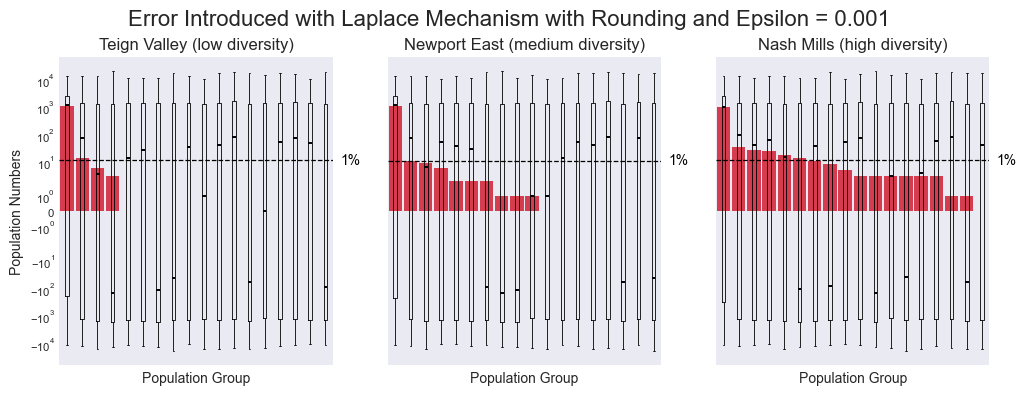

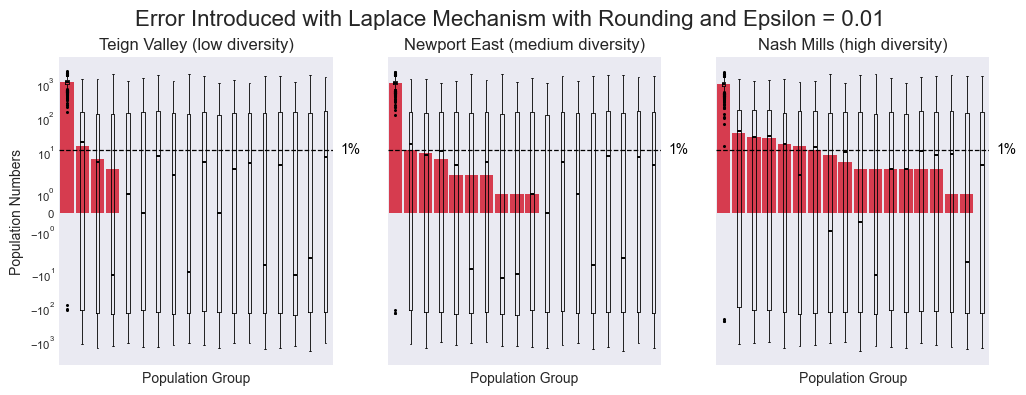

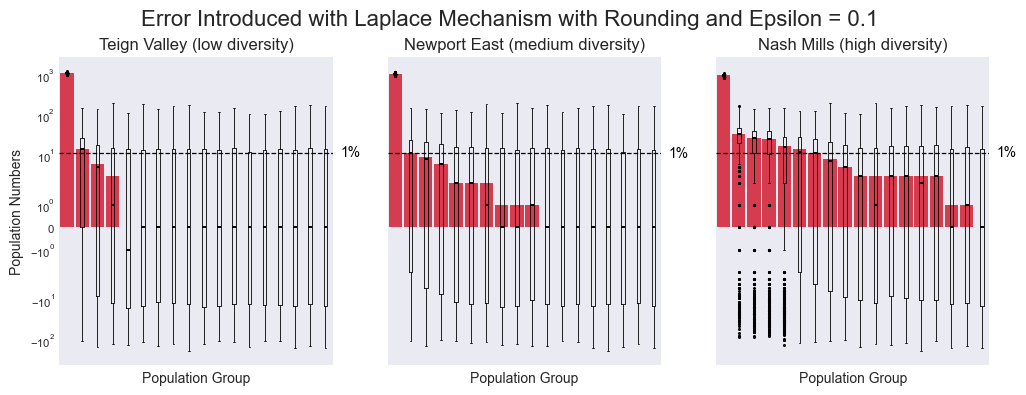

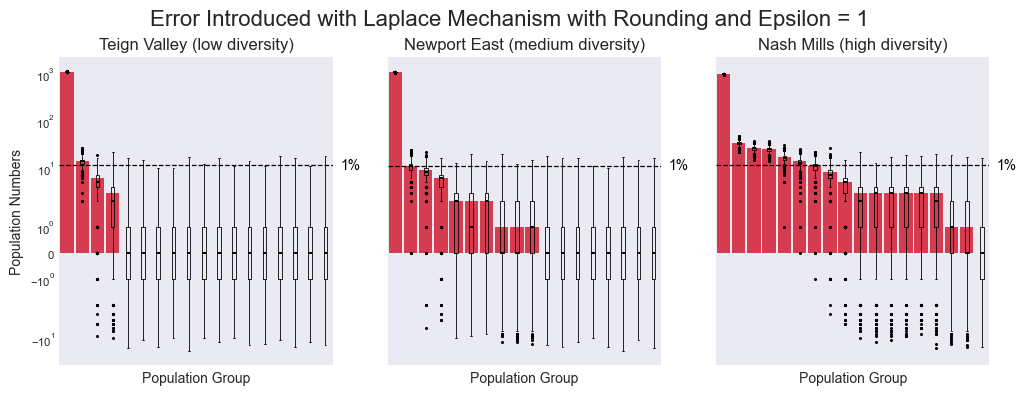

In [48]:
population_plot_error_bars_numbers_laplace(
    df_populations_round,
    "PopulationNumbersDP",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Rounding and ",
    file_name="_rounding_line_1",
    showfliers=True,
    lineval=1,
)

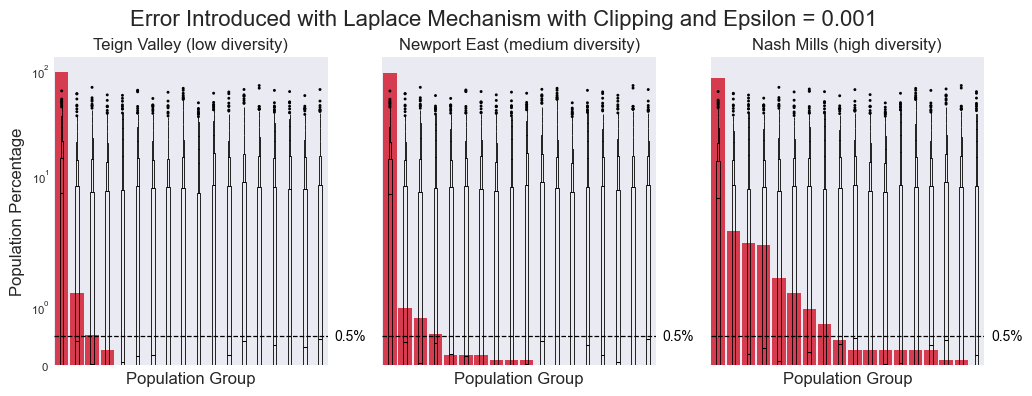

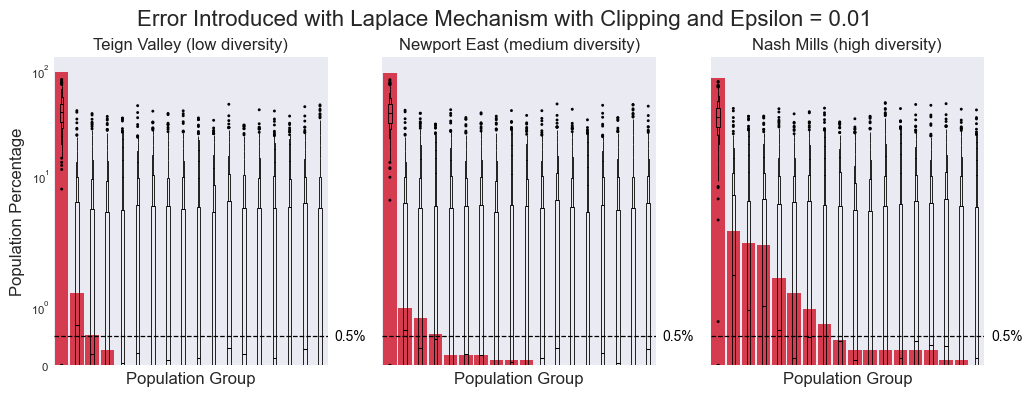

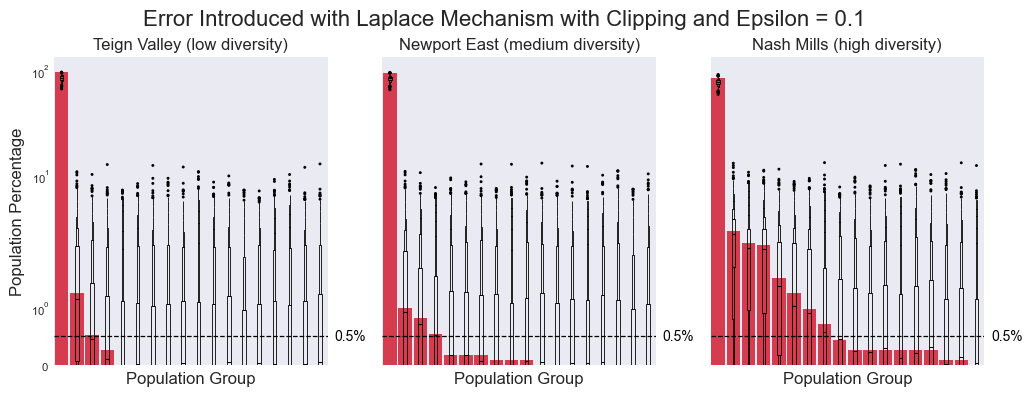

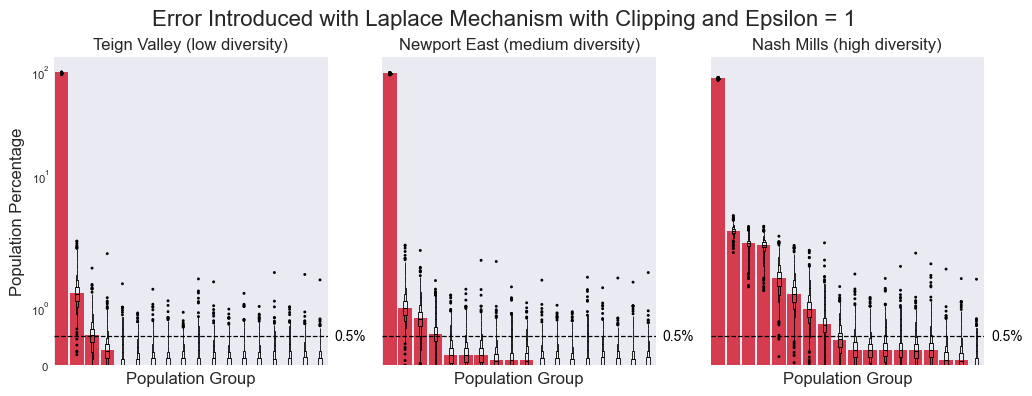

In [49]:
create_plots.population_plot_error_bars_laplace_boxen(
    df_populations_clip,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Clipping and ",
    file_name="_clipping_line_0_5",
    showfliers=True,
    lineval=0.5,
)

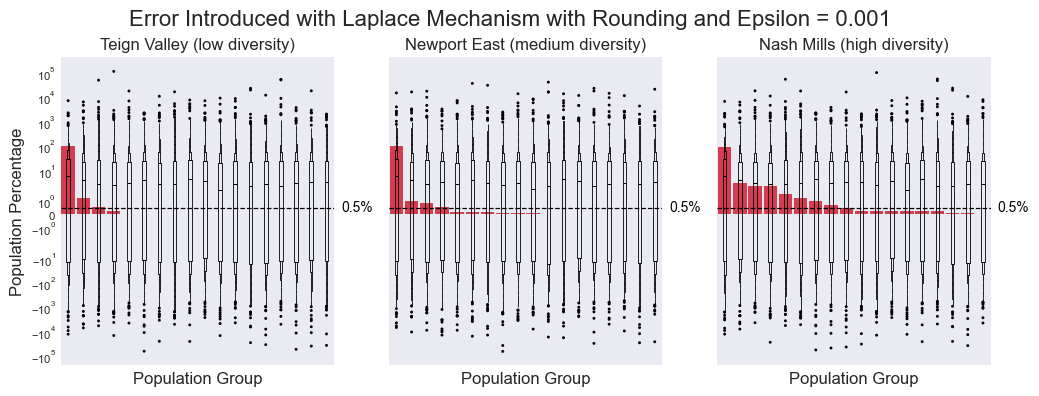

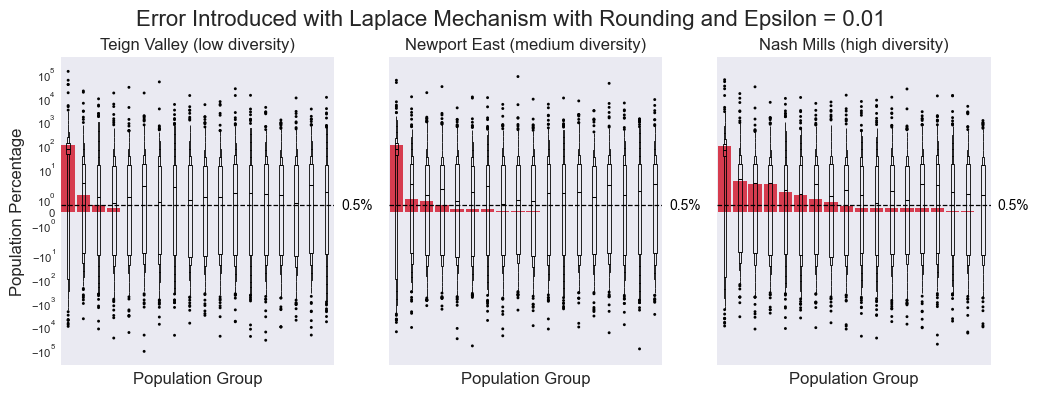

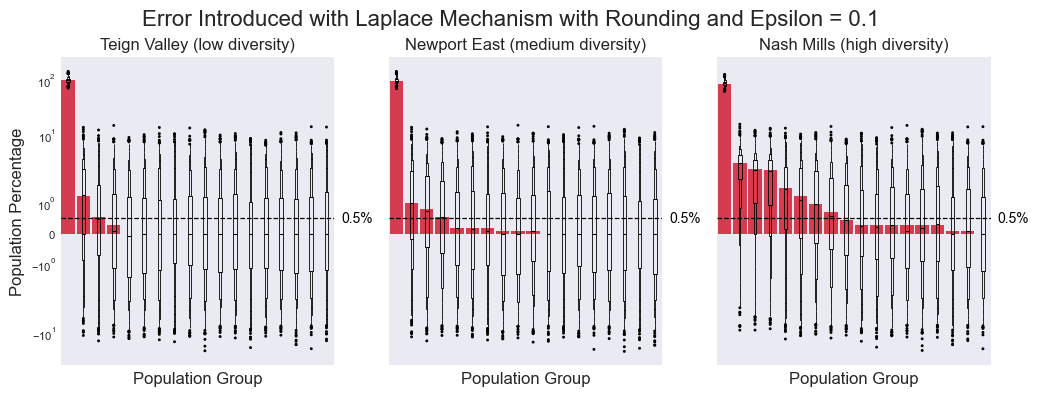

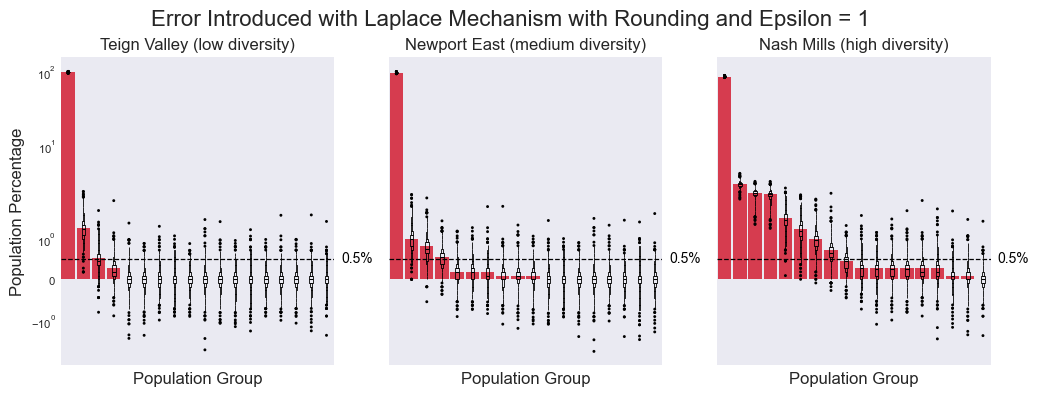

In [50]:
create_plots.population_plot_error_bars_laplace_boxen(
    df_populations_round,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Rounding and ",
    file_name="_rounding_line_0_5",
    showfliers=True,
    lineval=0.5,
)

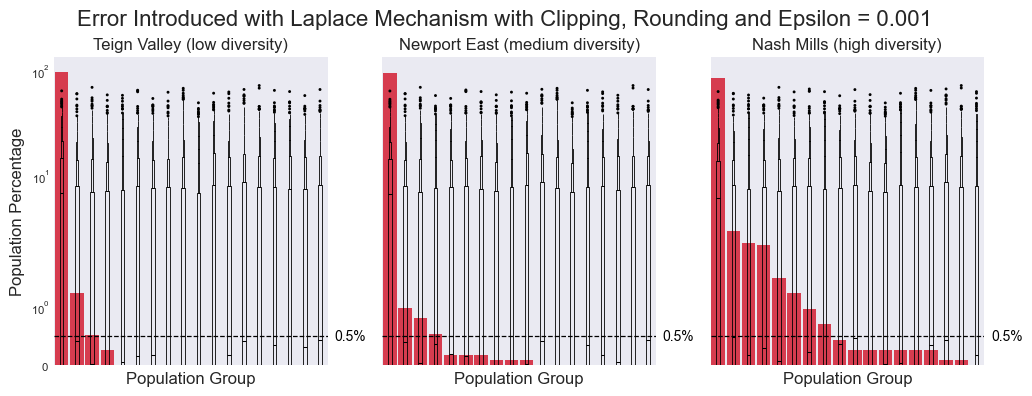

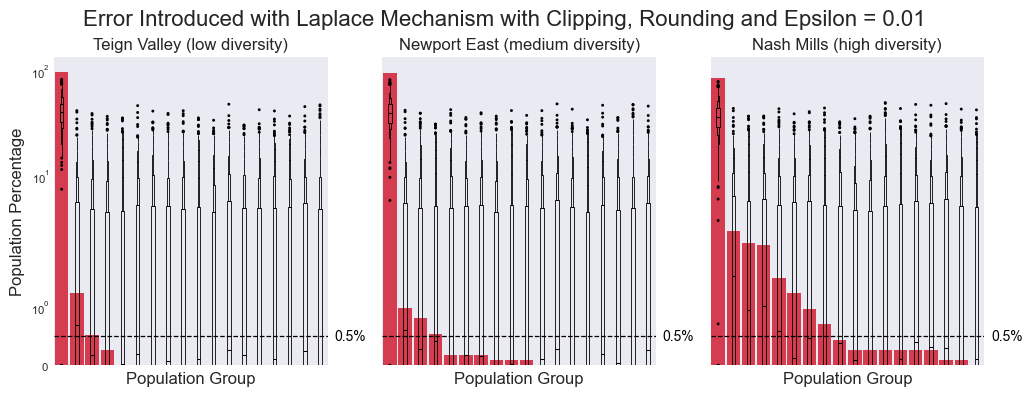

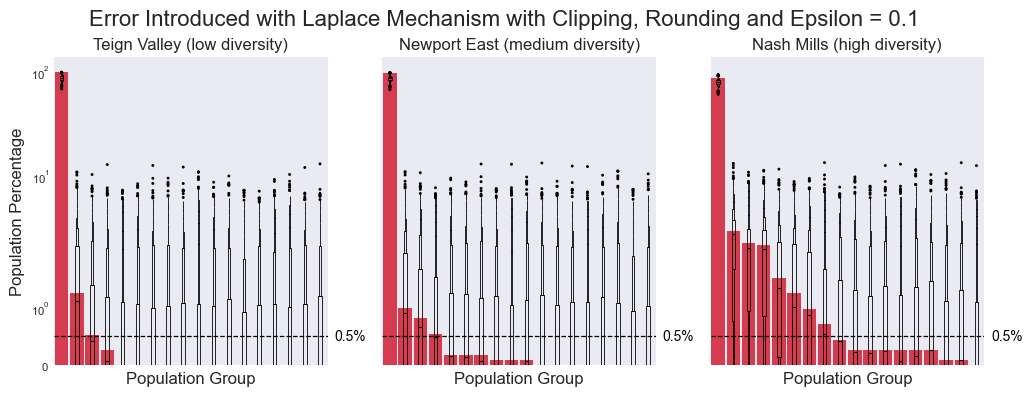

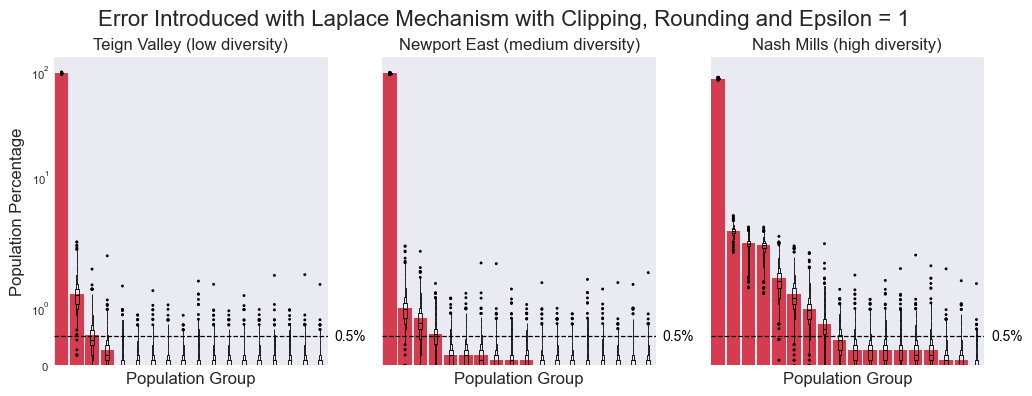

In [51]:
create_plots.population_plot_error_bars_laplace_boxen(
    df_populations_round_clip,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Clipping, Rounding and ",
    file_name="_clipping_rounding_line_0_5",
    showfliers=True,
    lineval=0.5,
)

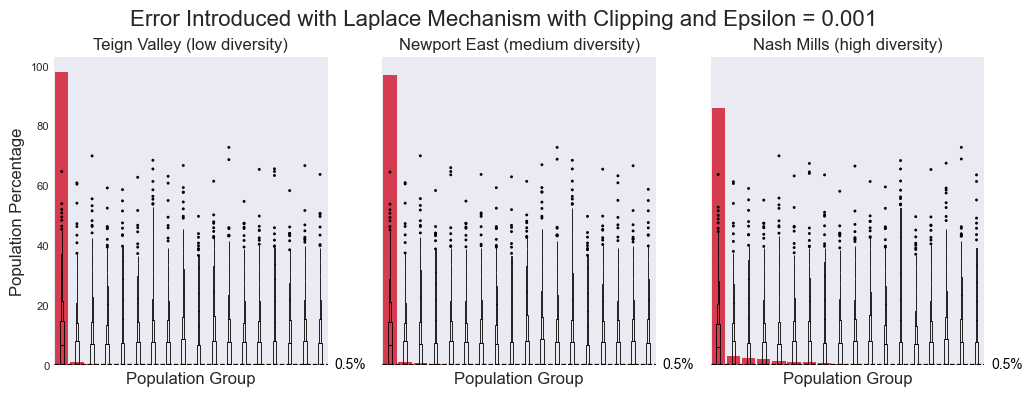

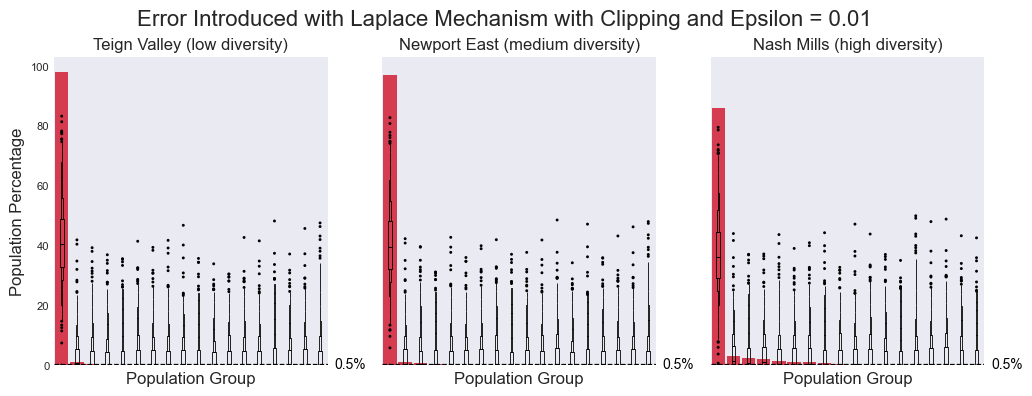

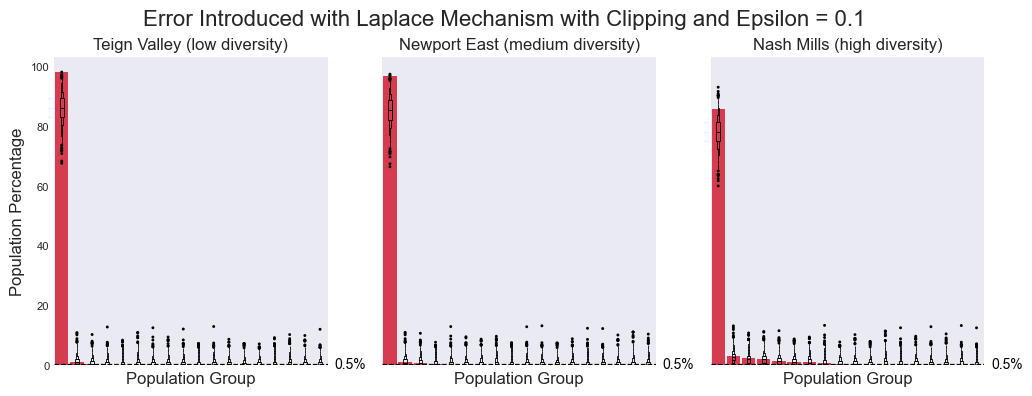

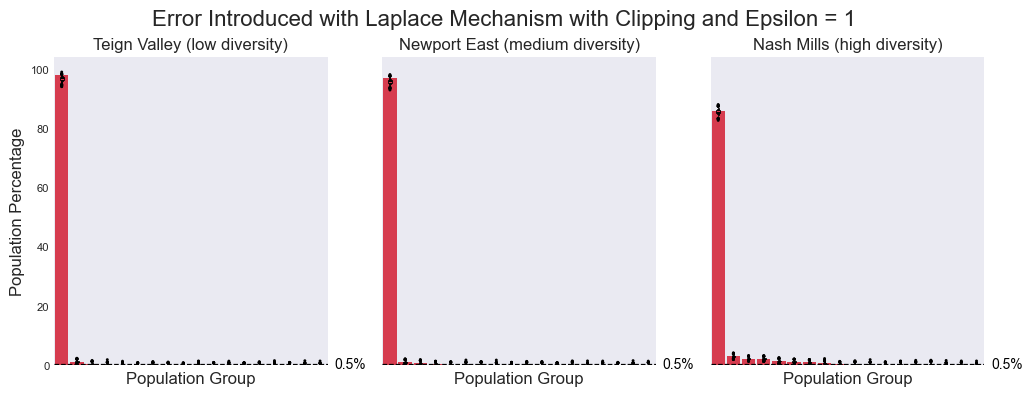

In [52]:
create_plots.population_plot_error_bars_laplace_boxen(
    df_populations_clip,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Clipping and ",
    file_name="_clipping_no_symlog_line_0_5",
    showfliers=True,
    symlog=False,
    lineval=0.5,
)

In [53]:
df_population_reduced = df_populations_clip.query(
    'area_name == "Nash Mills" & epsilon == 0.1'
)
df_population_reduced.sort_values(by=["total %"], inplace=True, ascending=False)
df_population_reduced["error"] = abs(
    df_population_reduced["total %"] - df_population_reduced["dp %"]
)

In [54]:
df_merged = evaluation_helpers.make_experiment_df_merged(
    experiments_clip_round,
    experiments,
    ward_names_extended,
    rmse_list + inc_dec_total_list,
    epsilons_short,
)
df_merged_round_clip = evaluation_helpers.make_experiment_df_merged_laplace(
    experiments_clip,
    experiments_round,
    experiments_clip_round,
    experiments,
    ward_names_extended,
    rmse_list,
    epsilons_short,
)
df_clip = evaluation_helpers.make_experiment_df(
    experiments_clip,
    ward_names_extended,
    rmse_list + inc_dec_total_list,
    epsilons_short,
)
df_clip_round = evaluation_helpers.make_experiment_df(
    experiments_clip_round,
    ward_names_extended,
    rmse_list + inc_dec_total_list,
    epsilons_short,
)
df_round = evaluation_helpers.make_experiment_df(
    experiments_round,
    ward_names_extended,
    rmse_list + inc_dec_total_list,
    epsilons_short,
)
df = evaluation_helpers.make_experiment_df(
    experiments, ward_names_extended, rmse_list + inc_dec_total_list, epsilons_short
)

In [55]:
df_merged_pop = evaluation_helpers.make_experiment_df_merged(
    experiments_clip_round,
    experiments,
    ward_names_extended,
    table_features_pop,
    epsilons_short,
)

In [56]:
kl_list = ["kl_divergence", "kl_divergence_data_error", "kl_divergence_data_error_dp"]
df_clip_kl = evaluation_helpers.make_experiment_df_kl(
    measurement_kl_divergence_df_clip, ward_names_extended, kl_list, epsilons_short, mus
)
df_clip_round_kl = evaluation_helpers.make_experiment_df_kl(
    measurement_kl_divergence_df_clip, ward_names_extended, kl_list, epsilons_short, mus
)

<Figure size 1400x800 with 0 Axes>

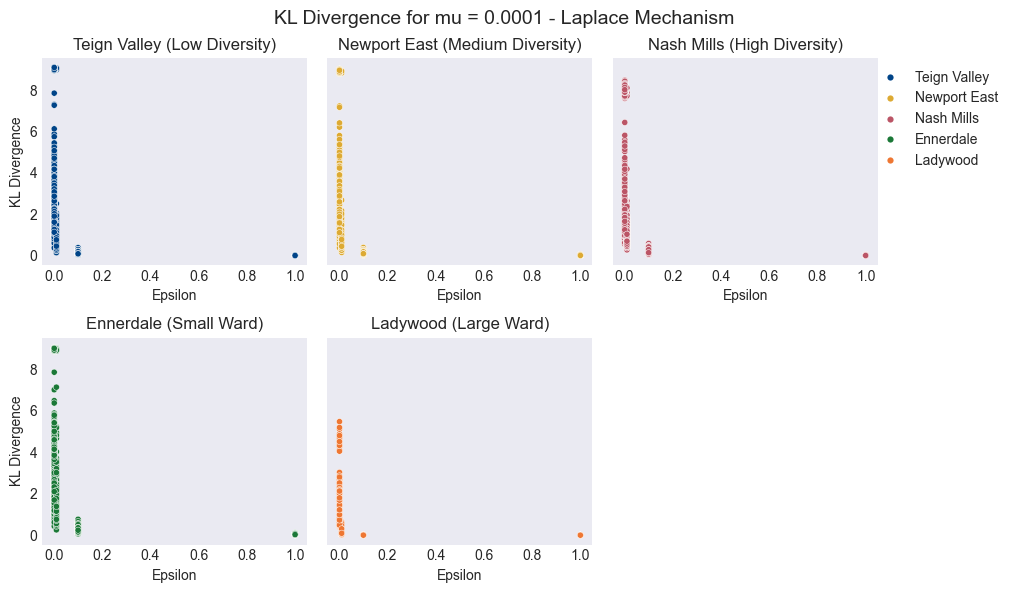

In [57]:
create_plots.kl_experiments_scatter(
    df_clip_kl,
    0.0001,
    ward_labels_extended,
    colors_5,
    fig_folder_name,
    "- Laplace Mechanism",
    filename="_laplace",
)

<Figure size 1400x800 with 0 Axes>

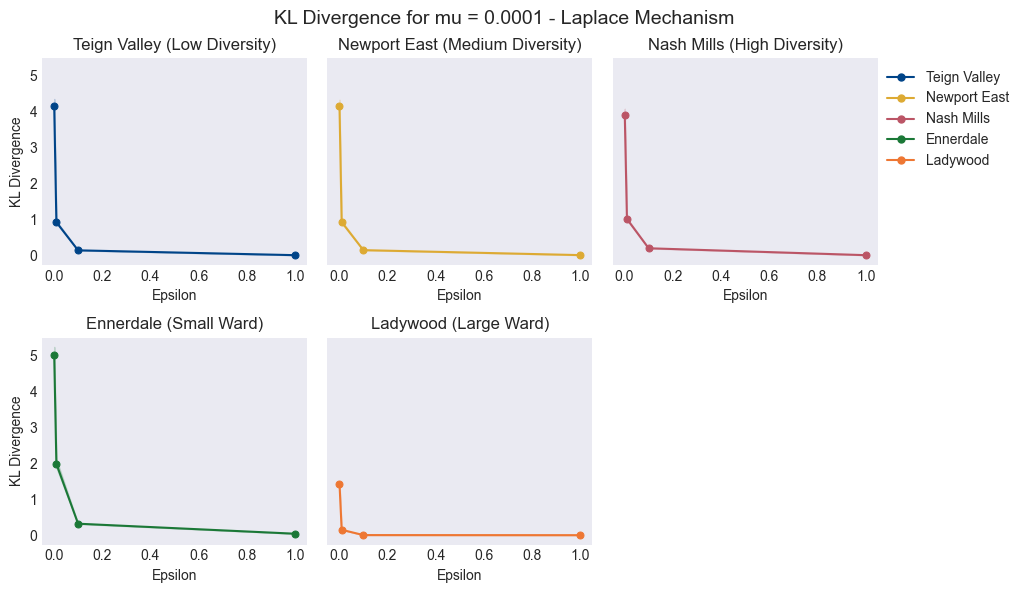

In [58]:
create_plots.kl_experiments_line(
    df_clip_kl,
    0.0001,
    ward_labels_extended,
    colors_5,
    fig_folder_name,
    "- Laplace Mechanism",
    filename="_laplace",
)

<Figure size 1400x800 with 0 Axes>

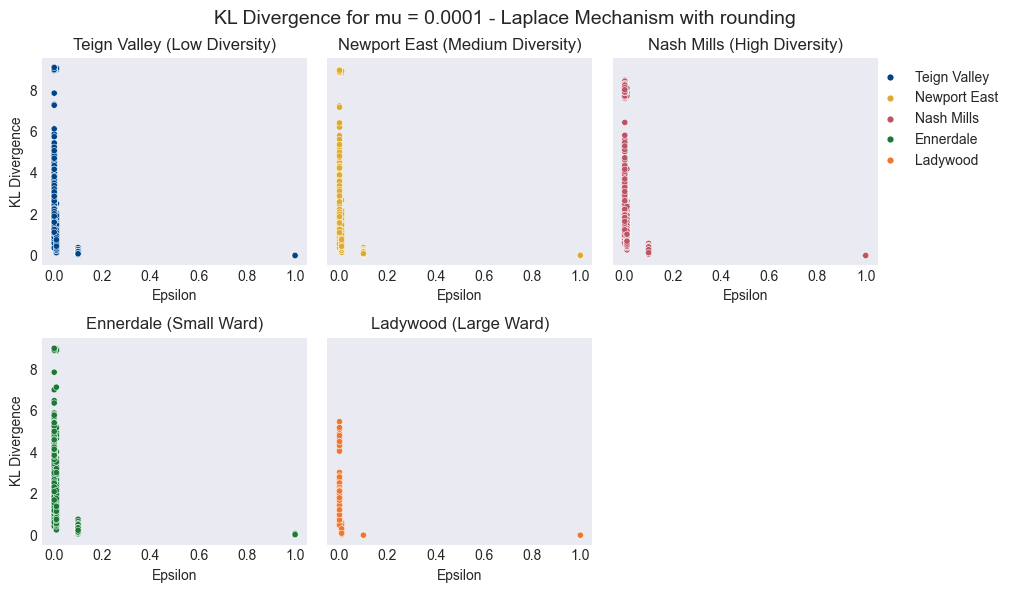

In [59]:
create_plots.kl_experiments_scatter(
    df_clip_round_kl,
    0.0001,
    ward_labels_extended,
    colors_5,
    fig_folder_name,
    "- Laplace Mechanism with rounding",
    filename="_laplace_round",
)

<Figure size 1400x800 with 0 Axes>

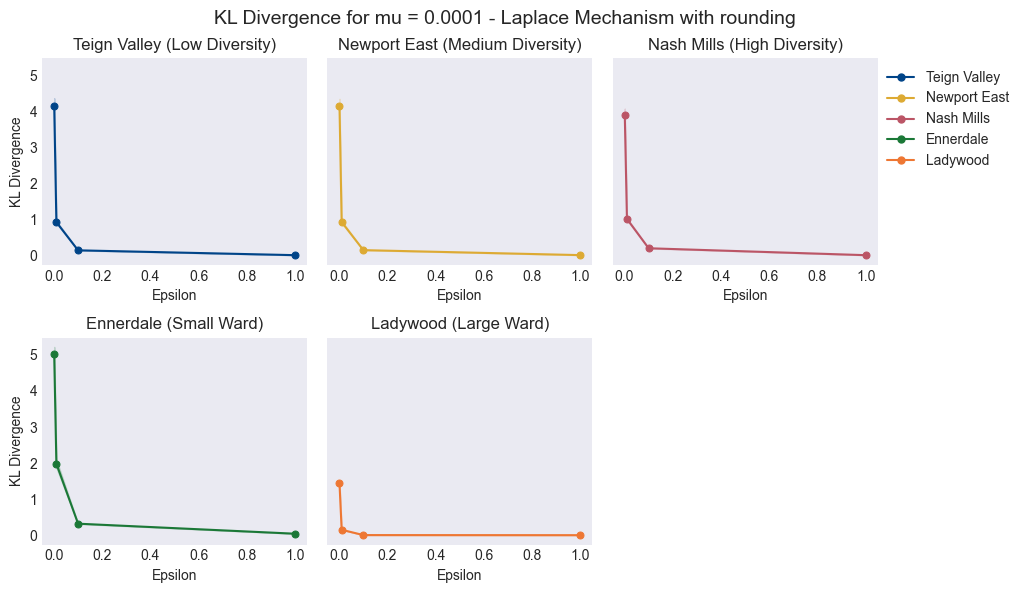

In [60]:
create_plots.kl_experiments_line(
    df_clip_round_kl,
    0.0001,
    ward_labels_extended,
    colors_5,
    fig_folder_name,
    "- Laplace Mechanism with rounding",
    filename="_laplace_round",
)

<Figure size 1400x800 with 0 Axes>

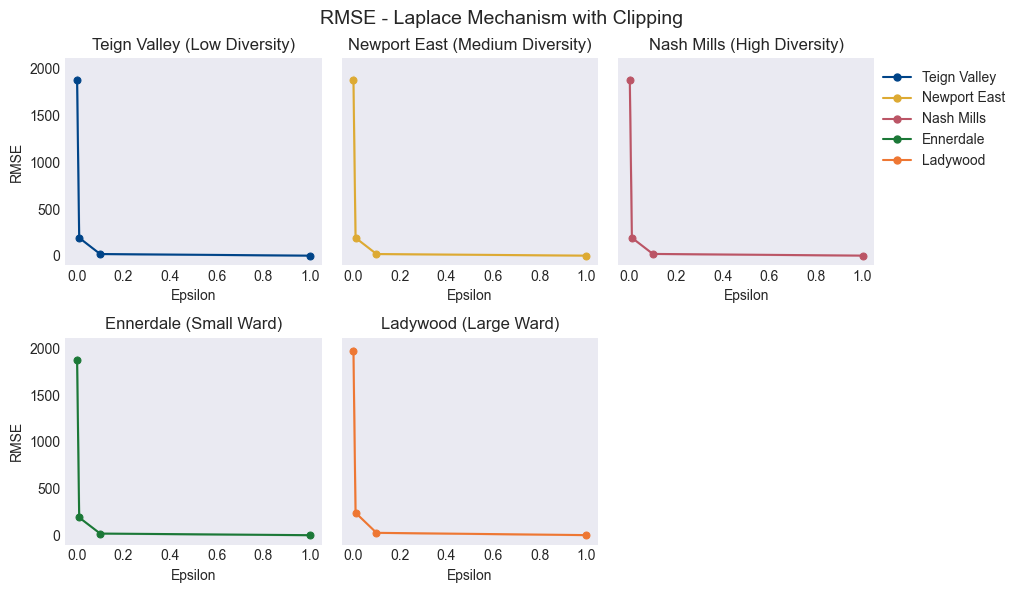

In [61]:
create_plots.rmse_experiments(
    df_clip,
    ward_labels_extended,
    colors_5,
    fig_folder_name,
    "- Laplace Mechanism with Clipping",
    filename="_laplace_clip",
)

<Figure size 1400x800 with 0 Axes>

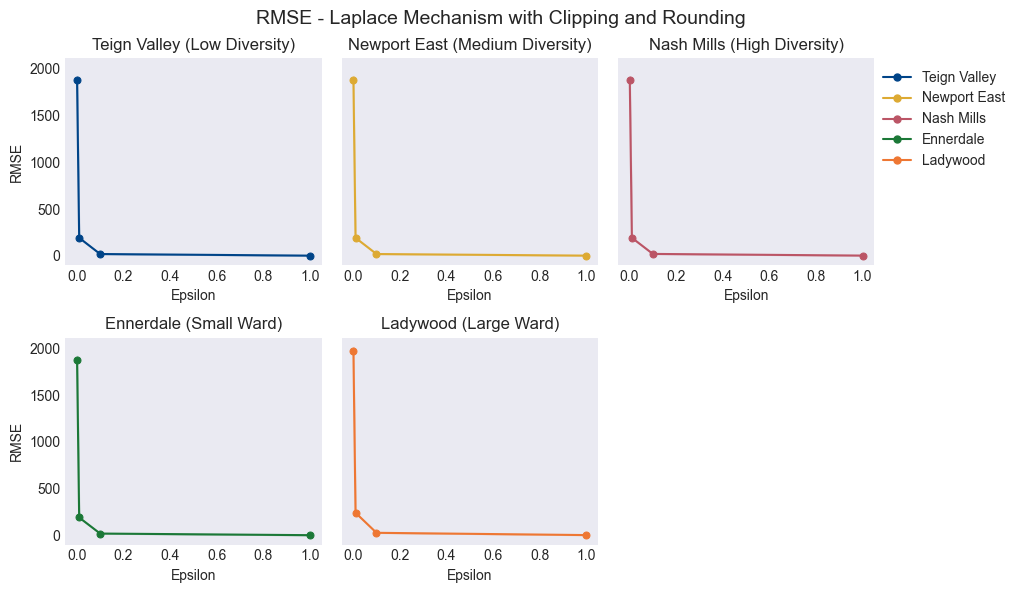

In [62]:
create_plots.rmse_experiments(
    df_clip_round,
    ward_labels_extended,
    colors_5,
    fig_folder_name,
    "- Laplace Mechanism with Clipping and Rounding",
    filename="_laplace_clip_round",
)

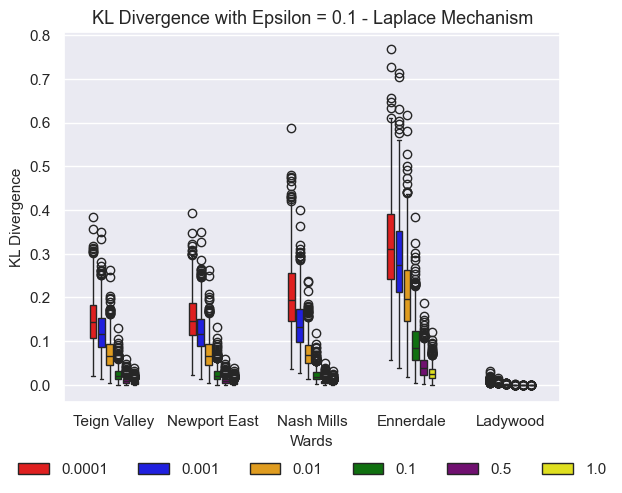

In [63]:
create_plots.create_boxplot_merged_experiments_kl(
    df_clip_kl, "kl_divergence", 0.1, fig_folder_name, "- Laplace Mechanism", "_laplace"
)

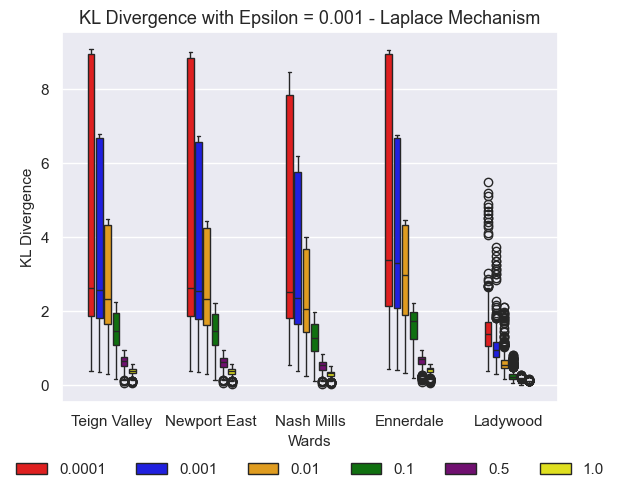

In [64]:
create_plots.create_boxplot_merged_experiments_kl(
    df_clip_kl,
    "kl_divergence",
    0.001,
    fig_folder_name,
    "- Laplace Mechanism",
    "_laplace",
)

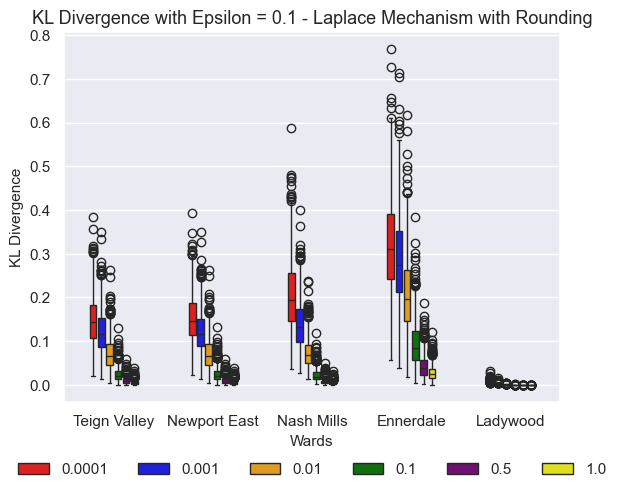

In [65]:
create_plots.create_boxplot_merged_experiments_kl(
    df_clip_round_kl,
    "kl_divergence",
    0.1,
    fig_folder_name,
    "- Laplace Mechanism with Rounding",
    "_laplace_round",
)

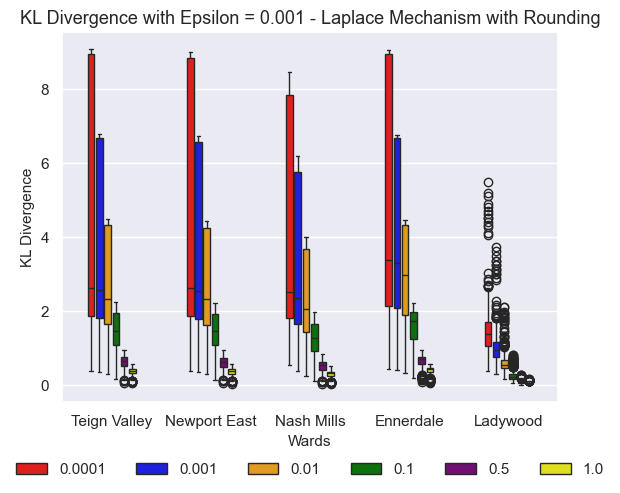

In [66]:
create_plots.create_boxplot_merged_experiments_kl(
    df_clip_round_kl,
    "kl_divergence",
    0.001,
    fig_folder_name,
    "- Laplace Mechanism with Rounding",
    "_laplace_round",
)

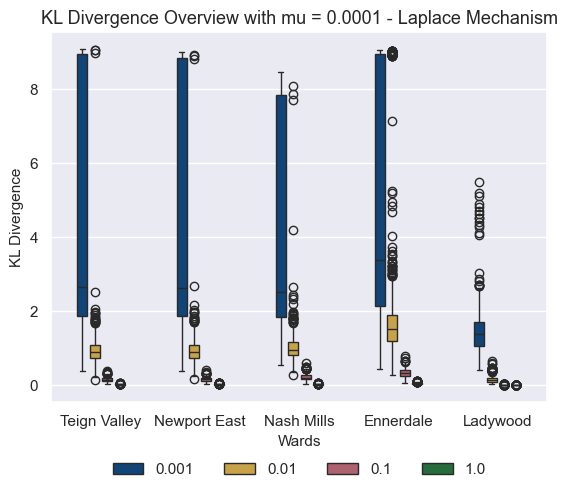

In [67]:
create_plots.create_boxplot_experiments_kl(
    df_clip_kl,
    "kl_divergence",
    0.0001,
    fig_folder_name,
    colors_4,
    "- Laplace Mechanism",
    "_laplace",
)

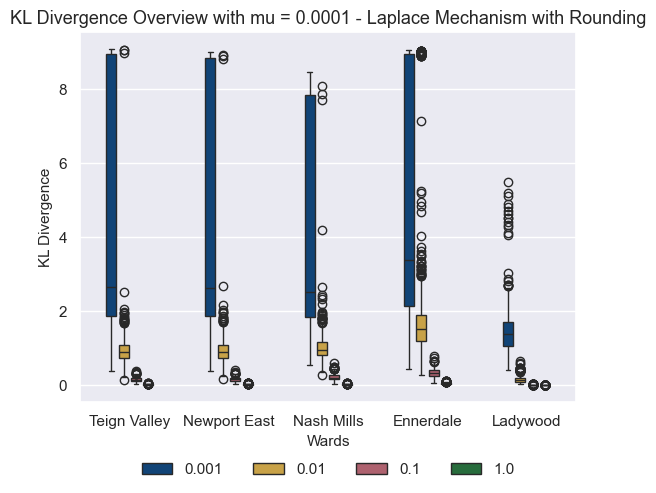

In [68]:
create_plots.create_boxplot_experiments_kl(
    df_clip_round_kl,
    "kl_divergence",
    0.0001,
    fig_folder_name,
    colors_4,
    "- Laplace Mechanism with Rounding",
    "_laplace",
)

In [69]:
epsilons_short_reverse = epsilons_short.copy()
epsilons_short_reverse.reverse()

df_inc_mean: 0.619, df_min_mean: 0.619, df_zero_mean: 7.029
df_inc_mean: 2.915, df_min_mean: 2.915, df_zero_mean: 4.045
df_inc_mean: 3.743, df_min_mean: 3.743, df_zero_mean: 0.507
df_inc_mean: 2.935, df_min_mean: 2.935, df_zero_mean: 4.978
df_inc_mean: 0.143, df_min_mean: 0.143, df_zero_mean: 0.0


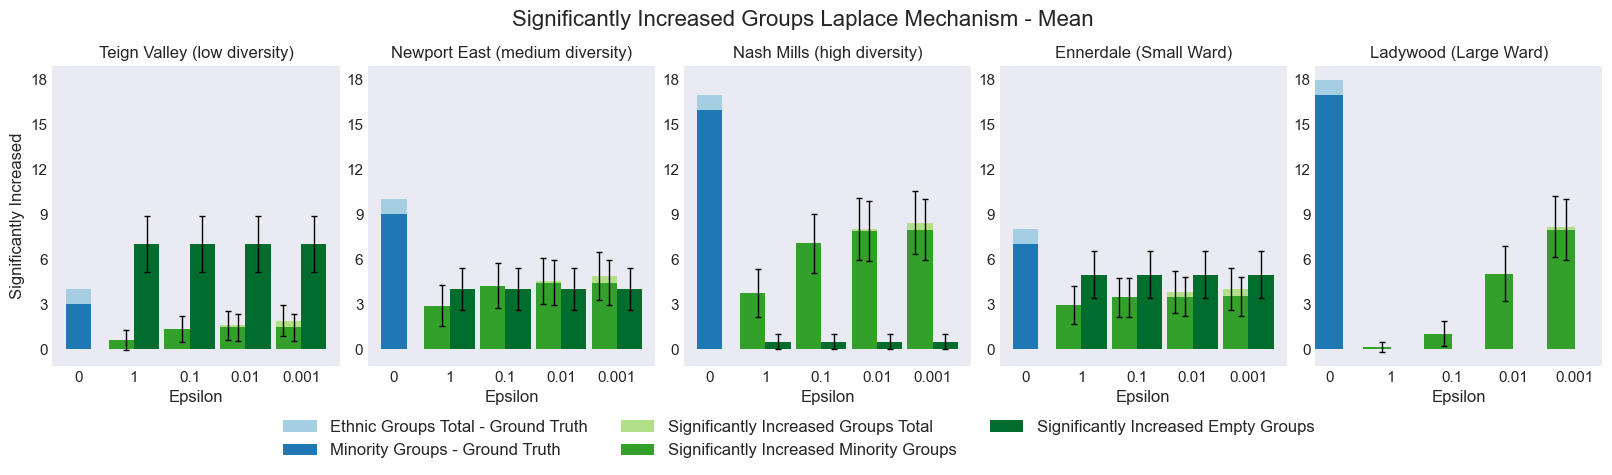

In [70]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_all_wards",
    "Laplace Mechanism",
)

df_inc_mean: 0.619, df_min_mean: 0.619, df_zero_mean: 7.029
df_inc_mean: 2.915, df_min_mean: 2.915, df_zero_mean: 4.045
df_inc_mean: 3.743, df_min_mean: 3.743, df_zero_mean: 0.507
df_inc_mean: 2.935, df_min_mean: 2.935, df_zero_mean: 4.978
df_inc_mean: 0.143, df_min_mean: 0.143, df_zero_mean: 0.0


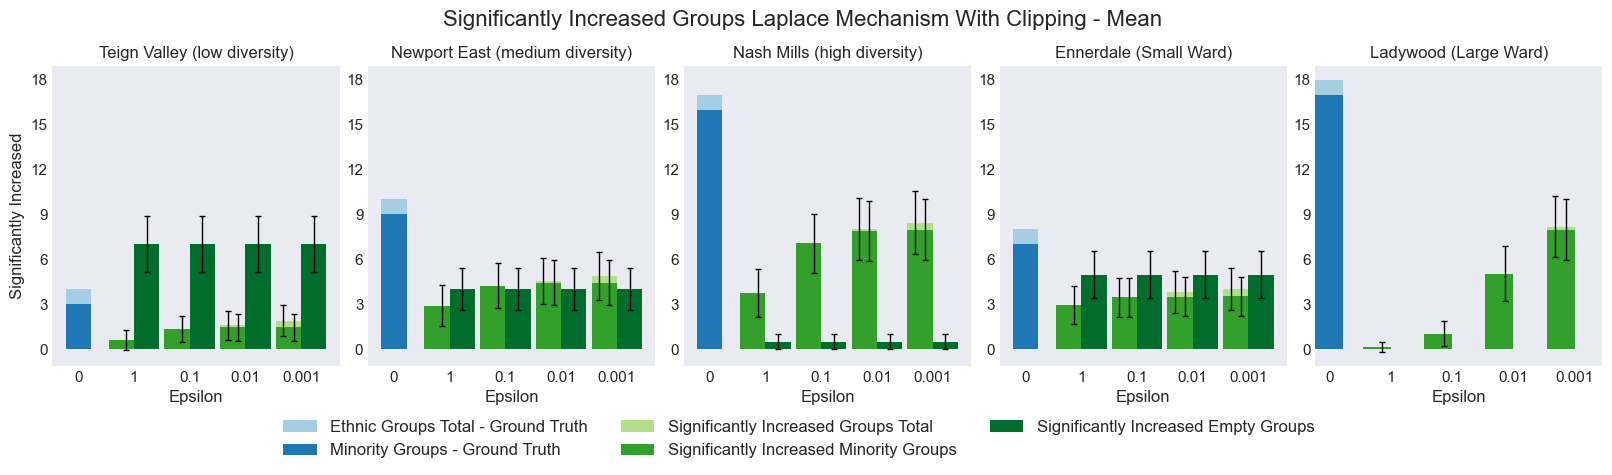

In [71]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_clip_all_wards",
    "Laplace Mechanism With Clipping",
)

df_inc_mean: 0.515, df_min_mean: 0.515, df_zero_mean: 4.293
df_inc_mean: 2.197, df_min_mean: 2.197, df_zero_mean: 2.473
df_inc_mean: 2.988, df_min_mean: 2.988, df_zero_mean: 0.311
df_inc_mean: 2.008, df_min_mean: 2.008, df_zero_mean: 3.033
df_inc_mean: 0.111, df_min_mean: 0.111, df_zero_mean: 0.0


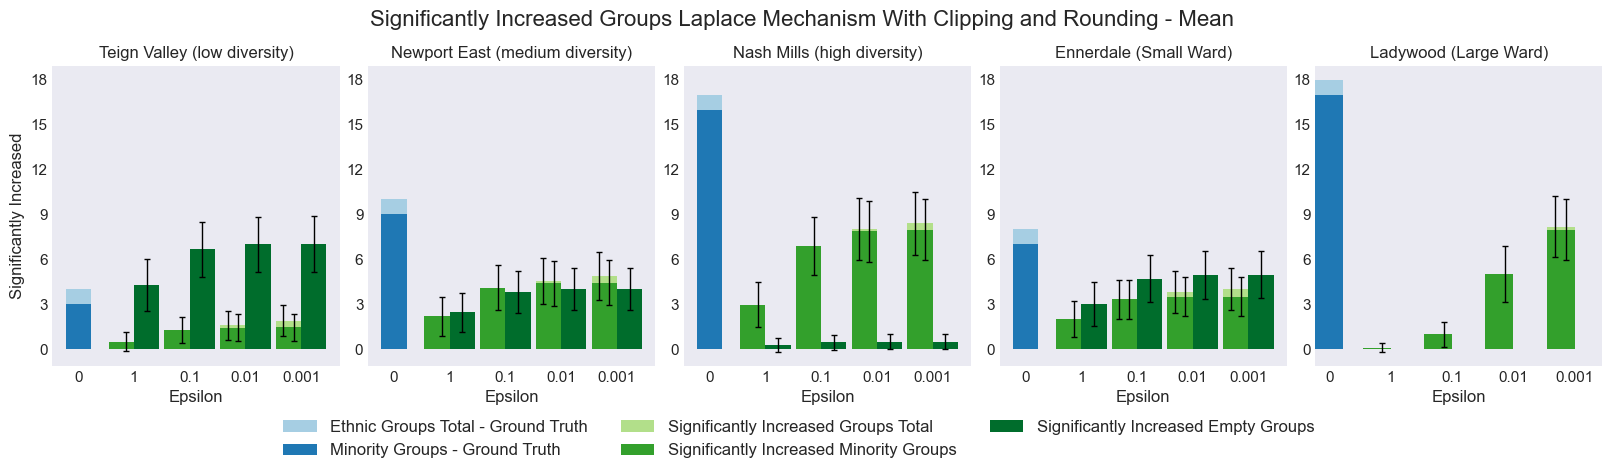

In [72]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip_round,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_clip_round_all_wards",
    "Laplace Mechanism With Clipping and Rounding",
)

df_inc_mean: 0.515, df_min_mean: 0.515, df_zero_mean: 4.293
df_inc_mean: 2.197, df_min_mean: 2.197, df_zero_mean: 2.473
df_inc_mean: 2.988, df_min_mean: 2.988, df_zero_mean: 0.311
df_inc_mean: 2.008, df_min_mean: 2.008, df_zero_mean: 3.033
df_inc_mean: 0.111, df_min_mean: 0.111, df_zero_mean: 0.0


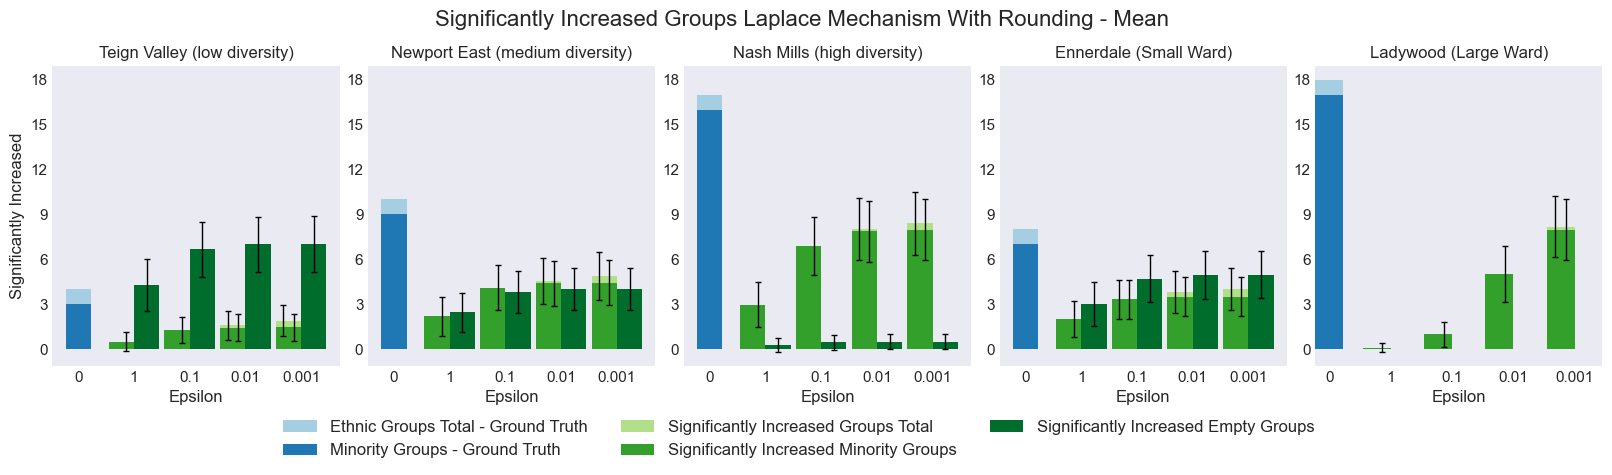

In [73]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_round,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_round_all_wards",
    "Laplace Mechanism With Rounding",
)

df_inc_mean: 0.619, df_min_mean: 0.619, df_zero_mean: 7.029
df_inc_mean: 2.914, df_min_mean: 2.914, df_zero_mean: 4.045
df_inc_mean: 3.743, df_min_mean: 3.743, df_zero_mean: 0.507
df_inc_mean: 2.935, df_min_mean: 2.935, df_zero_mean: 4.978
df_inc_mean: 0.144, df_min_mean: 0.144, df_zero_mean: 0.0


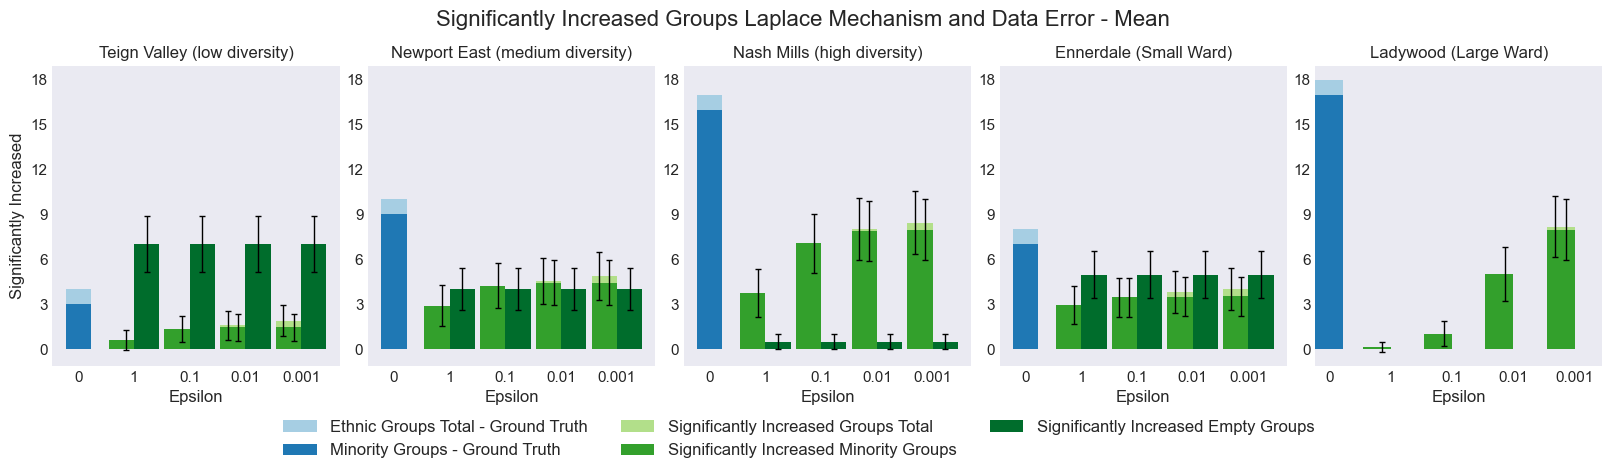

In [74]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased_data_error_dp",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_all_wards",
    "Laplace Mechanism and Data Error",
)

df_inc_median: 1.0, df_min_median: 1.0, df_zero_median: 7.0
df_inc_median: 3.0, df_min_median: 3.0, df_zero_median: 4.0
df_inc_median: 4.0, df_min_median: 4.0, df_zero_median: 1.0
df_inc_median: 3.0, df_min_median: 3.0, df_zero_median: 5.0
df_inc_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


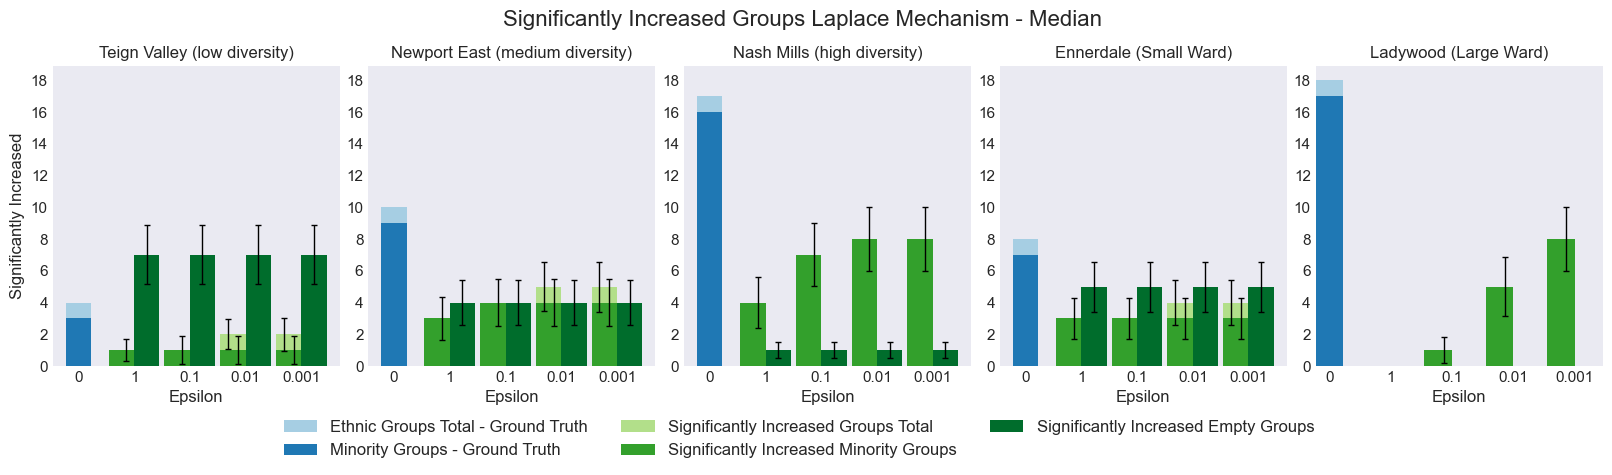

In [75]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_all_wards",
    "Laplace Mechanism",
)

df_inc_median: 1.0, df_min_median: 1.0, df_zero_median: 7.0
df_inc_median: 3.0, df_min_median: 3.0, df_zero_median: 4.0
df_inc_median: 4.0, df_min_median: 4.0, df_zero_median: 1.0
df_inc_median: 3.0, df_min_median: 3.0, df_zero_median: 5.0
df_inc_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


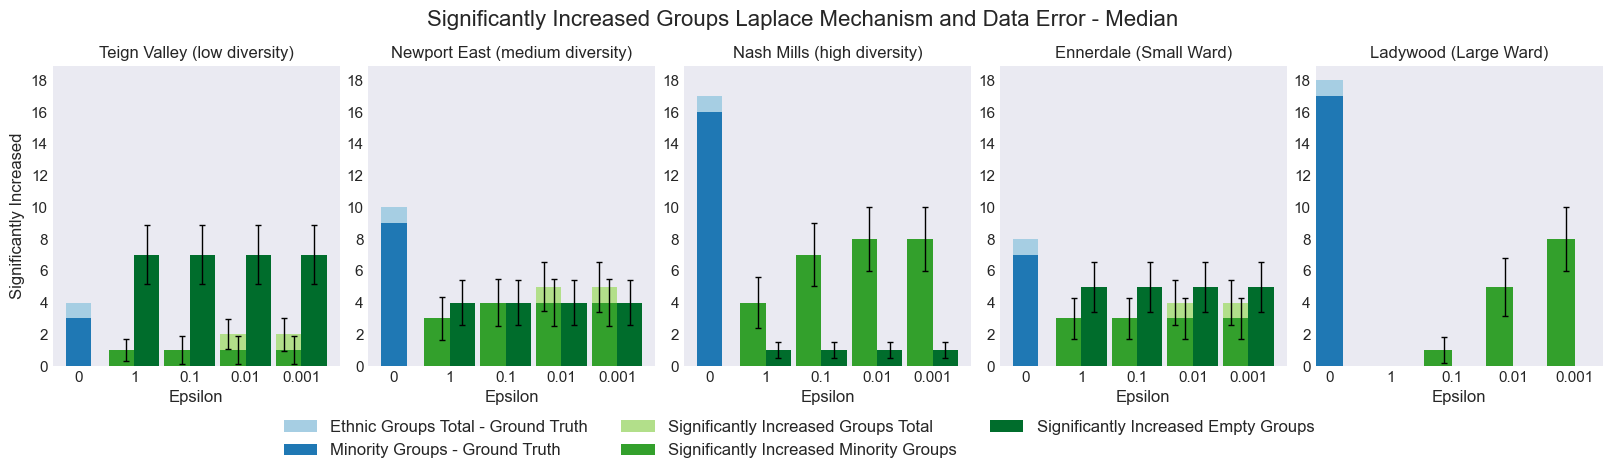

In [76]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased_data_error_dp",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_all_wards",
    "Laplace Mechanism and Data Error",
)

df_inc_median: 1.0, df_min_median: 1.0, df_zero_median: 7.0
df_inc_median: 3.0, df_min_median: 3.0, df_zero_median: 4.0
df_inc_median: 4.0, df_min_median: 4.0, df_zero_median: 1.0
df_inc_median: 3.0, df_min_median: 3.0, df_zero_median: 5.0
df_inc_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


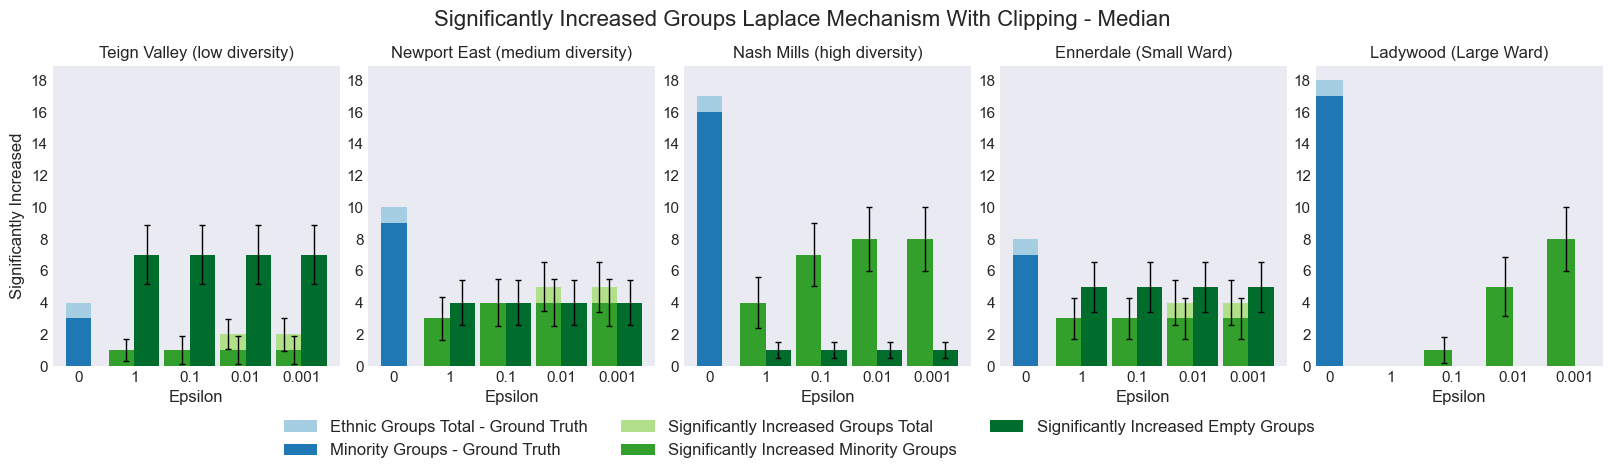

In [77]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_clip_all_wards",
    "Laplace Mechanism With Clipping",
)

df_inc_median: 0.0, df_min_median: 0.0, df_zero_median: 4.0
df_inc_median: 2.0, df_min_median: 2.0, df_zero_median: 2.0
df_inc_median: 3.0, df_min_median: 3.0, df_zero_median: 0.0
df_inc_median: 2.0, df_min_median: 2.0, df_zero_median: 3.0
df_inc_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


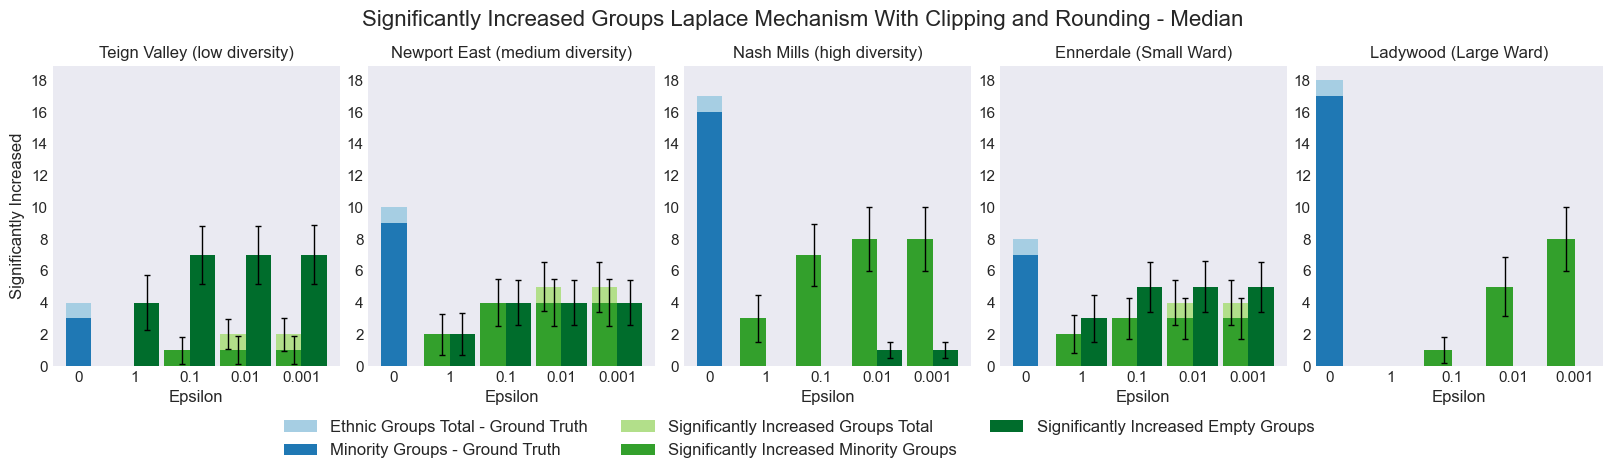

In [78]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip_round,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_clip_round_all_wards",
    "Laplace Mechanism With Clipping and Rounding",
)

df_inc_median: 0.0, df_min_median: 0.0, df_zero_median: 4.0
df_inc_median: 2.0, df_min_median: 2.0, df_zero_median: 2.0
df_inc_median: 3.0, df_min_median: 3.0, df_zero_median: 0.0
df_inc_median: 2.0, df_min_median: 2.0, df_zero_median: 3.0
df_inc_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


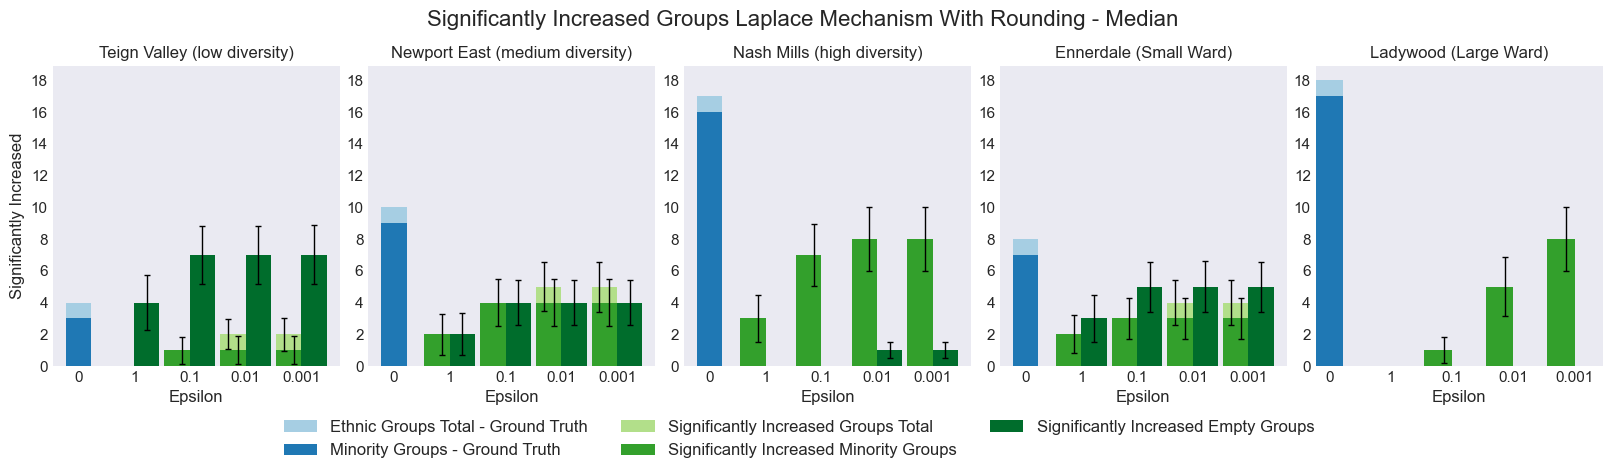

In [79]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_round,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_round_all_wards",
    "Laplace Mechanism With Rounding",
)

df_dec_mean: 0.689, df_min_mean: 0.689, df_zero_mean: 6.967
df_dec_mean: 3.096, df_min_mean: 3.096, df_zero_mean: 3.952
df_dec_mean: 3.704, df_min_mean: 3.704, df_zero_mean: 0.491
df_dec_mean: 2.905, df_min_mean: 2.905, df_zero_mean: 5.018
df_dec_mean: 0.148, df_min_mean: 0.148, df_zero_mean: 0.0


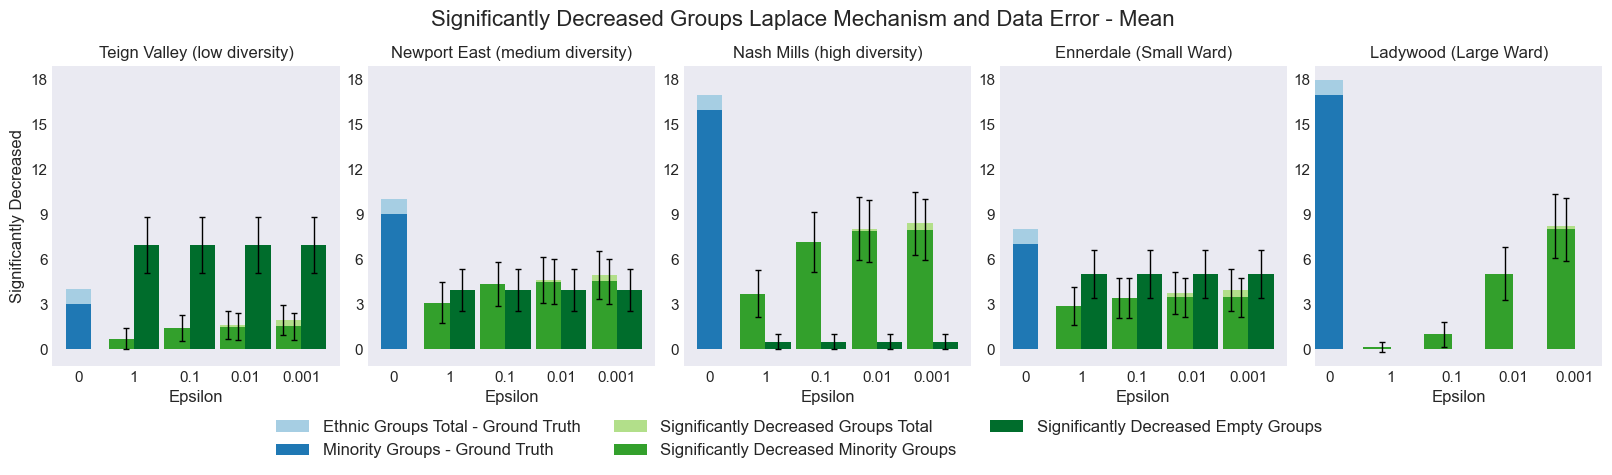

In [80]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased_data_error_dp",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_all_wards",
    "Laplace Mechanism and Data Error",
)

df_dec_mean: 0.689, df_min_mean: 0.689, df_zero_mean: 6.967
df_dec_mean: 3.095, df_min_mean: 3.095, df_zero_mean: 3.952
df_dec_mean: 3.704, df_min_mean: 3.704, df_zero_mean: 0.491
df_dec_mean: 2.905, df_min_mean: 2.905, df_zero_mean: 5.018
df_dec_mean: 0.146, df_min_mean: 0.146, df_zero_mean: 0.0


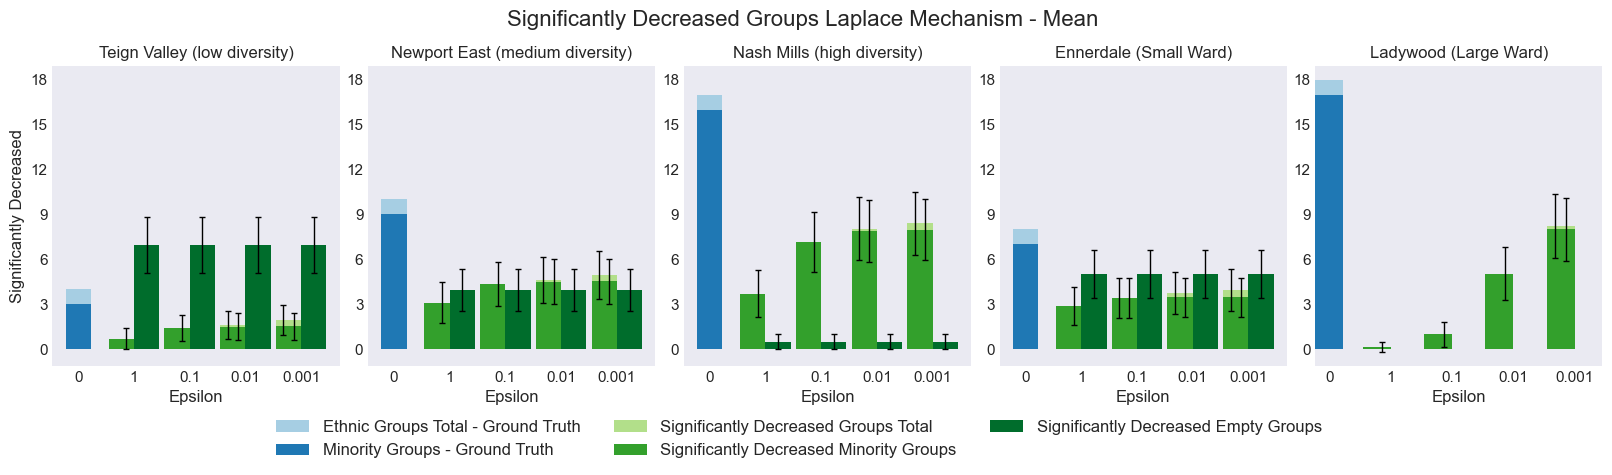

In [81]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_all_wards",
    "Laplace Mechanism",
)

df_dec_mean: 0.689, df_min_mean: 0.689, df_zero_mean: 0.0
df_dec_mean: 3.095, df_min_mean: 3.095, df_zero_mean: 0.0
df_dec_mean: 3.704, df_min_mean: 3.704, df_zero_mean: 0.0
df_dec_mean: 2.905, df_min_mean: 2.905, df_zero_mean: 0.0
df_dec_mean: 0.146, df_min_mean: 0.146, df_zero_mean: 0.0


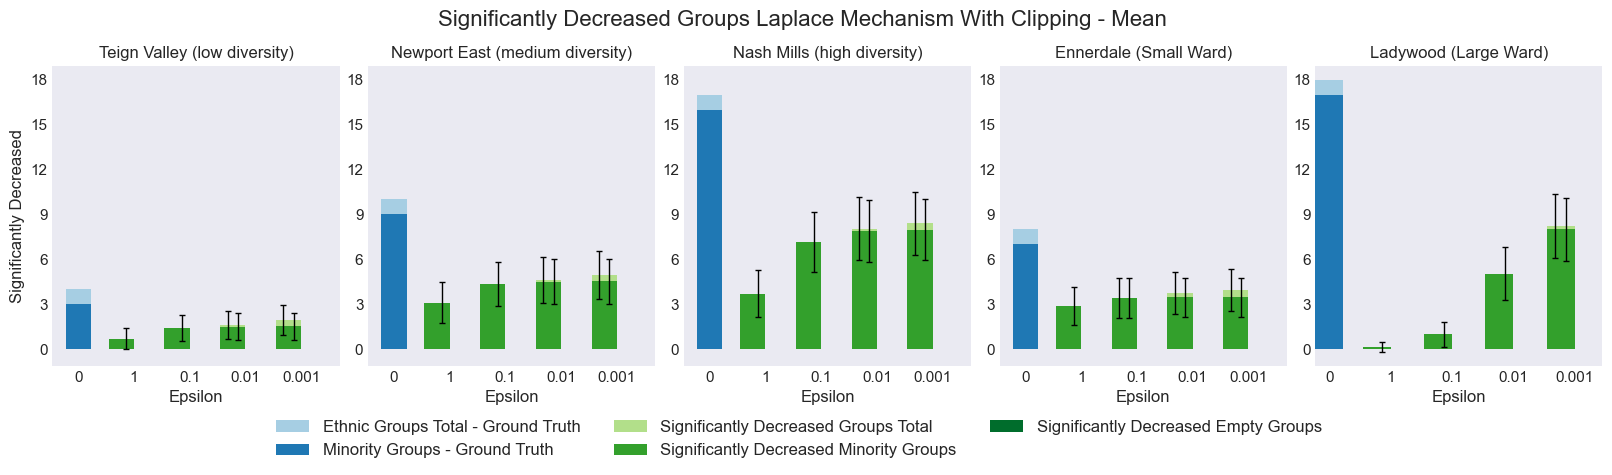

In [82]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_clip_all_wards",
    "Laplace Mechanism With Clipping",
)

df_dec_mean: 0.944, df_min_mean: 0.944, df_zero_mean: 0.0
df_dec_mean: 3.738, df_min_mean: 3.738, df_zero_mean: 0.0
df_dec_mean: 4.938, df_min_mean: 4.938, df_zero_mean: 0.0
df_dec_mean: 3.279, df_min_mean: 3.279, df_zero_mean: 0.0
df_dec_mean: 0.191, df_min_mean: 0.191, df_zero_mean: 0.0


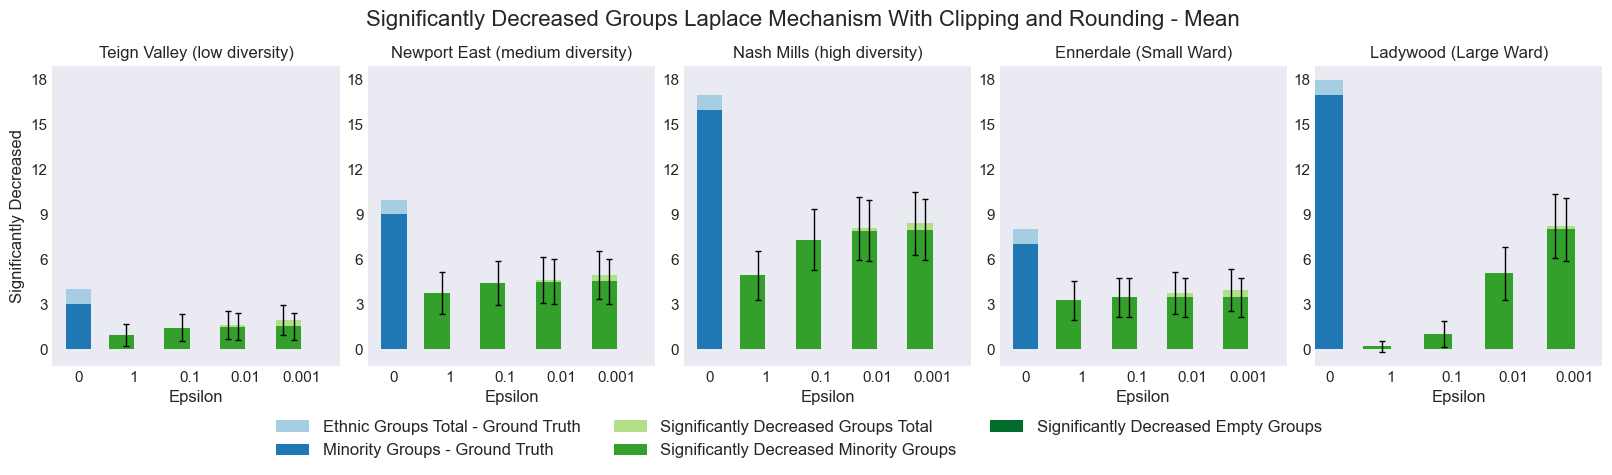

In [83]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip_round,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_clip_round_all_wards",
    "Laplace Mechanism With Clipping and Rounding",
)

df_dec_mean: 0.944, df_min_mean: 0.944, df_zero_mean: 4.277
df_dec_mean: 3.738, df_min_mean: 3.738, df_zero_mean: 2.421
df_dec_mean: 4.938, df_min_mean: 4.938, df_zero_mean: 0.309
df_dec_mean: 3.279, df_min_mean: 3.279, df_zero_mean: 3.048
df_dec_mean: 0.191, df_min_mean: 0.191, df_zero_mean: 0.0


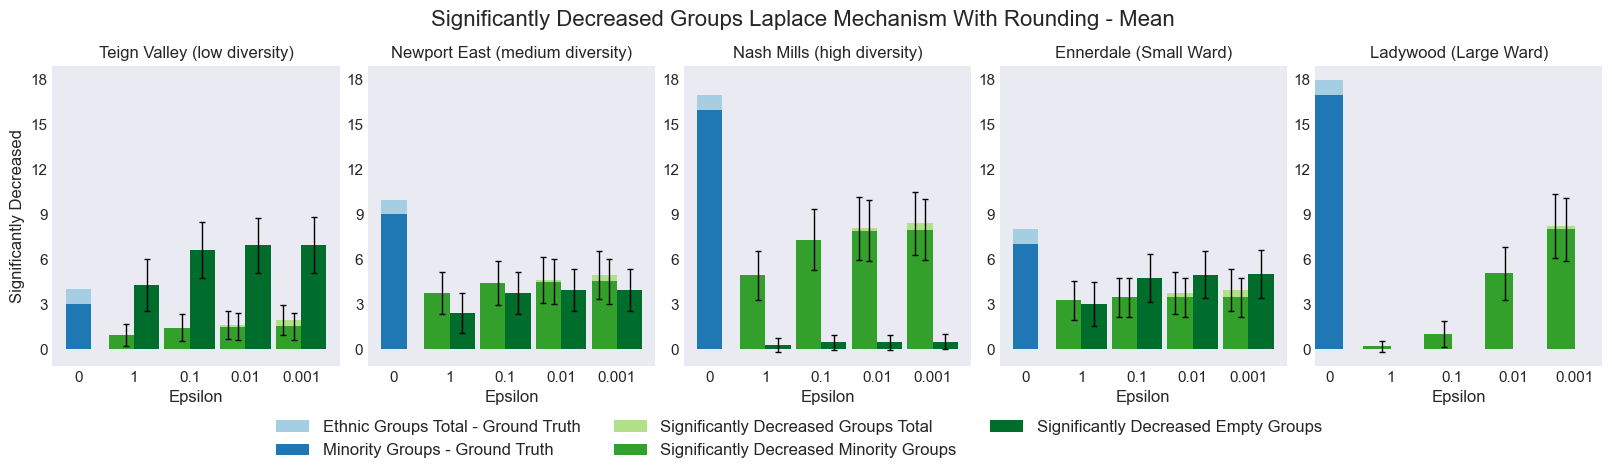

In [84]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_round,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_round_all_wards",
    "Laplace Mechanism With Rounding",
)

df_dec_median: 1.0, df_min_median: 1.0, df_zero_median: 7.0
df_dec_median: 3.0, df_min_median: 3.0, df_zero_median: 4.0
df_dec_median: 4.0, df_min_median: 4.0, df_zero_median: 0.0
df_dec_median: 3.0, df_min_median: 3.0, df_zero_median: 5.0
df_dec_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


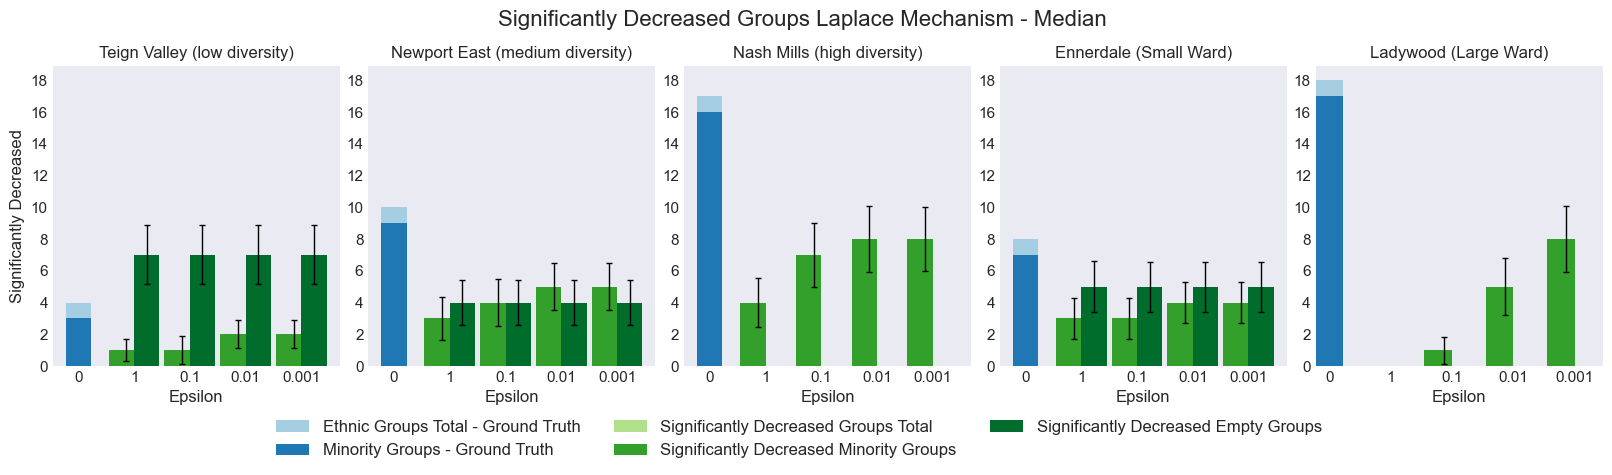

In [85]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_all_wards",
    "Laplace Mechanism",
)

df_dec_median: 1.0, df_min_median: 1.0, df_zero_median: 0.0
df_dec_median: 3.0, df_min_median: 3.0, df_zero_median: 0.0
df_dec_median: 4.0, df_min_median: 4.0, df_zero_median: 0.0
df_dec_median: 3.0, df_min_median: 3.0, df_zero_median: 0.0
df_dec_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


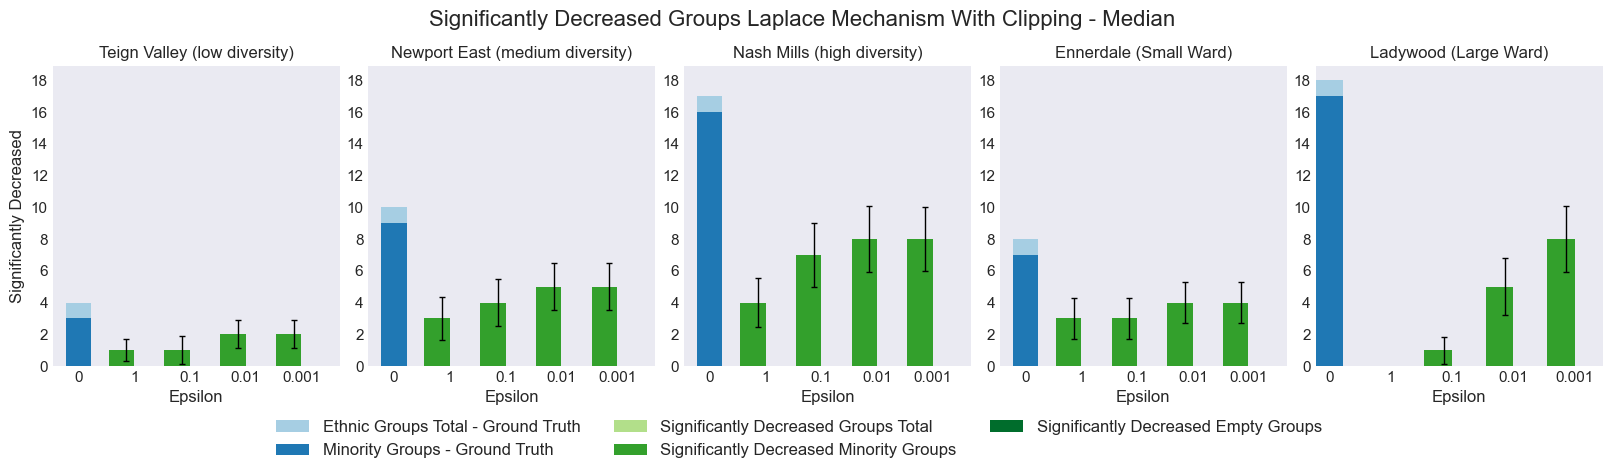

In [86]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_clip_all_wards",
    "Laplace Mechanism With Clipping",
)

df_dec_median: 1.0, df_min_median: 1.0, df_zero_median: 0.0
df_dec_median: 4.0, df_min_median: 4.0, df_zero_median: 0.0
df_dec_median: 5.0, df_min_median: 5.0, df_zero_median: 0.0
df_dec_median: 3.0, df_min_median: 3.0, df_zero_median: 0.0
df_dec_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


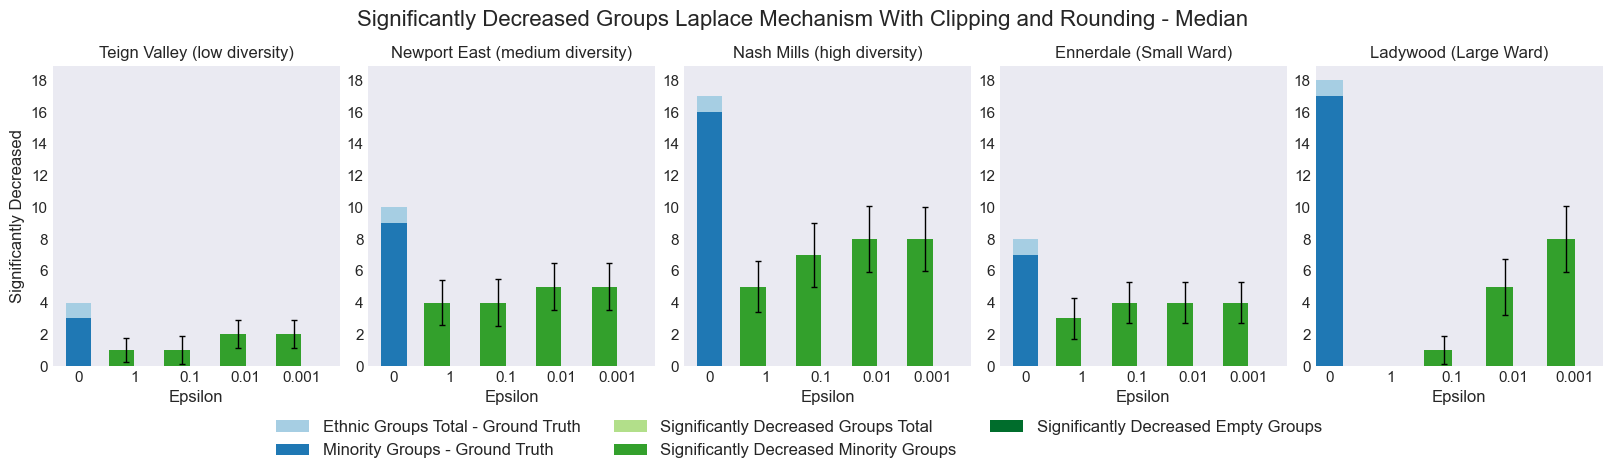

In [87]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip_round,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_clip_round_all_wards",
    "Laplace Mechanism With Clipping and Rounding",
)

df_dec_median: 1.0, df_min_median: 1.0, df_zero_median: 4.0
df_dec_median: 4.0, df_min_median: 4.0, df_zero_median: 2.0
df_dec_median: 5.0, df_min_median: 5.0, df_zero_median: 0.0
df_dec_median: 3.0, df_min_median: 3.0, df_zero_median: 3.0
df_dec_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


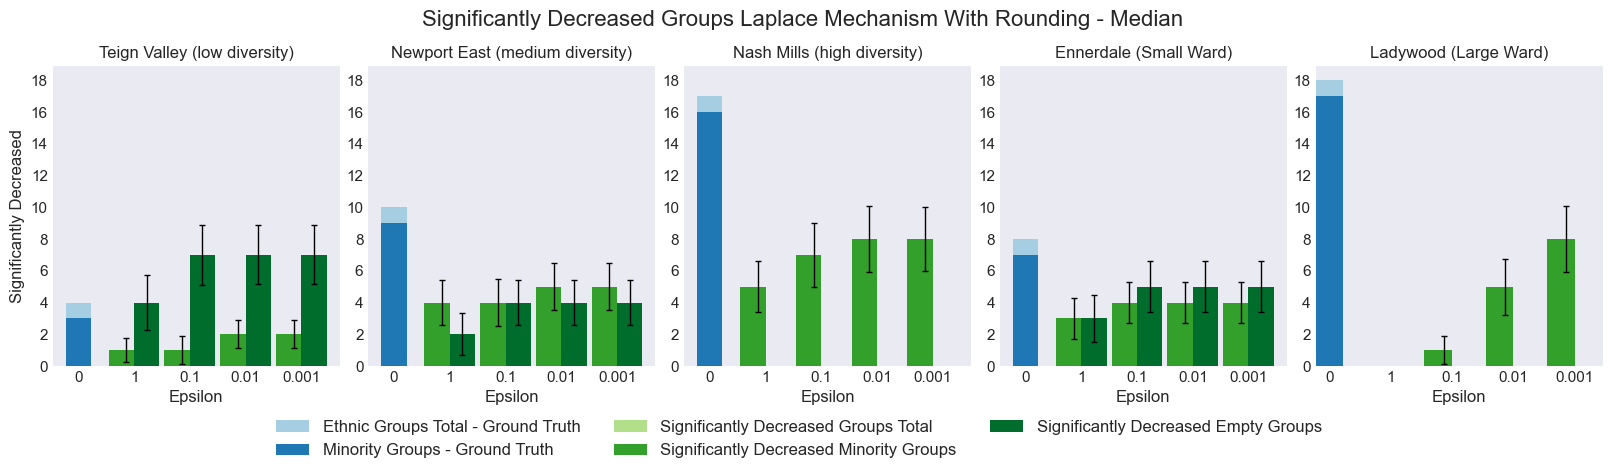

In [88]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_round,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_round_all_wards",
    "Laplace Mechanism With Rounding",
)

df_dec_median: 1.0, df_min_median: 1.0, df_zero_median: 7.0
df_dec_median: 3.0, df_min_median: 3.0, df_zero_median: 4.0
df_dec_median: 4.0, df_min_median: 4.0, df_zero_median: 0.0
df_dec_median: 3.0, df_min_median: 3.0, df_zero_median: 5.0
df_dec_median: 0.0, df_min_median: 0.0, df_zero_median: 0.0


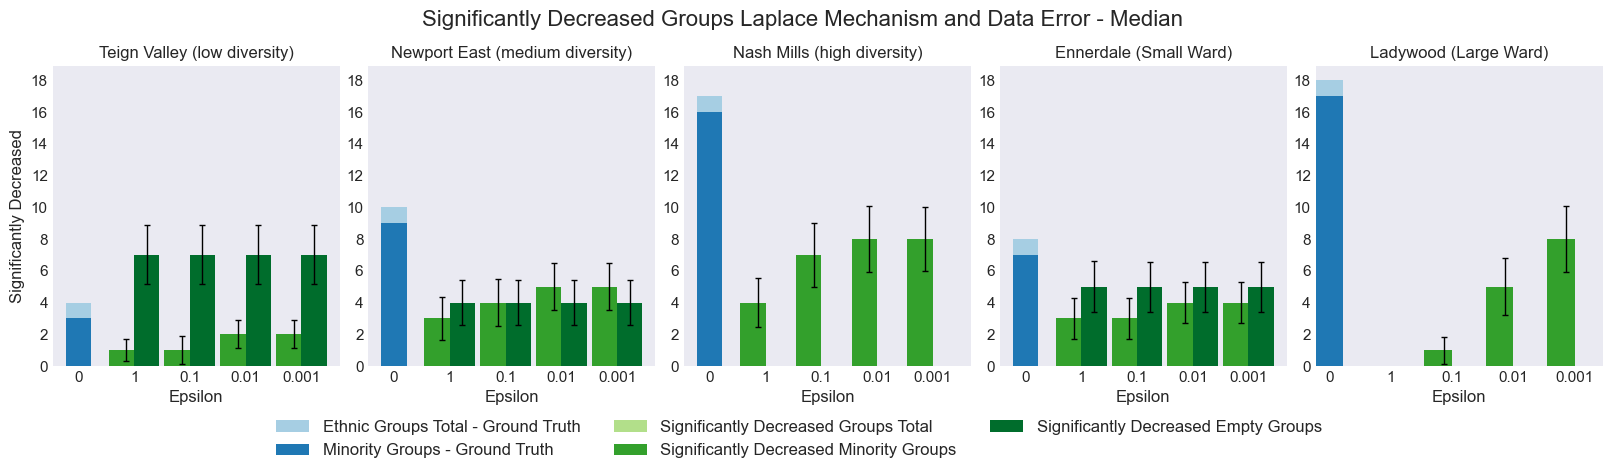

In [89]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased_data_error_dp",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_laplace_all_wards",
    "Laplace Mechanism and Data Error",
)

In [90]:
df_merged_no_rand = evaluation_helpers.make_experiment_df_merged(
    experiments_clip_no_rand,
    experiments_no_clip_no_rand,
    ward_names_extended,
    rmse_list,
    epsilons_short,
)
df_no_rand = evaluation_helpers.make_experiment_df(
    experiments_clip_no_rand, ward_names_extended, rmse_list, epsilons_short
)

In [91]:
df_merged_random_seed = evaluation_helpers.make_experiment_df_merged(
    experiments_clip_random_seed,
    experiments_no_clip_random_seed,
    ward_names_extended,
    rmse_list,
    epsilons_short,
)
df_random_seed = evaluation_helpers.make_experiment_df(
    experiments_no_clip_random_seed, ward_names_extended, rmse_list, epsilons_short
)

/home/krissi/Documents/Masterarbeit/diff-priv-minory/dp_experiments/create_plots.py:37: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df.query('rmse == @column_name & epsilon == @epsilon'), x='area_name', y='value', hue='postprocessing', palette=colors, width=0.5, gap=0.2)


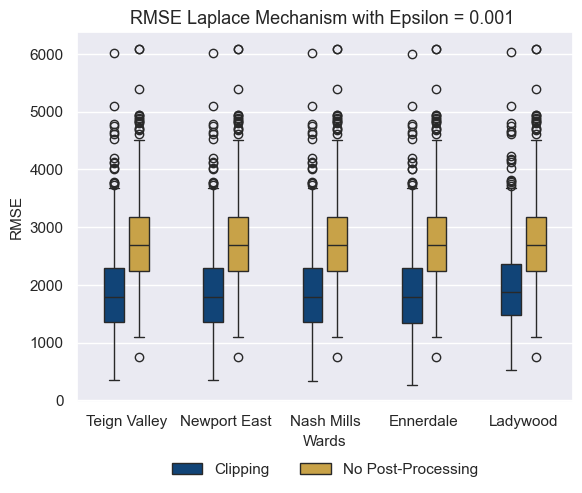

In [92]:
create_plots.create_boxplot_merged_experiments_laplace(
    df_merged, "rmse_dp", 0.001, fig_folder_name, colors_3
)

/home/krissi/Documents/Masterarbeit/diff-priv-minory/dp_experiments/create_plots.py:37: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df.query('rmse == @column_name & epsilon == @epsilon'), x='area_name', y='value', hue='postprocessing', palette=colors, width=0.5, gap=0.2)


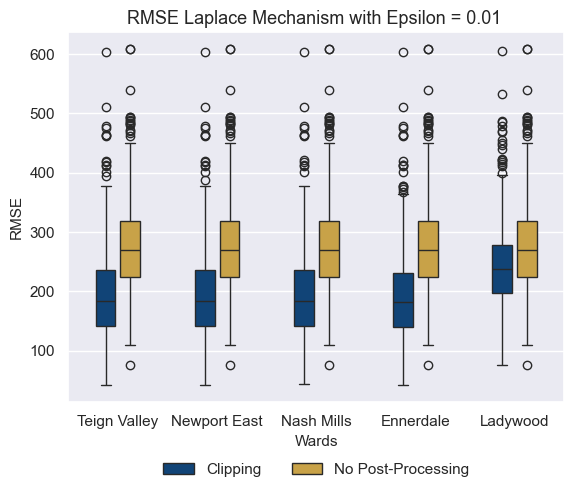

In [93]:
create_plots.create_boxplot_merged_experiments_laplace(
    df_merged, "rmse_dp", 0.01, fig_folder_name, colors_3
)

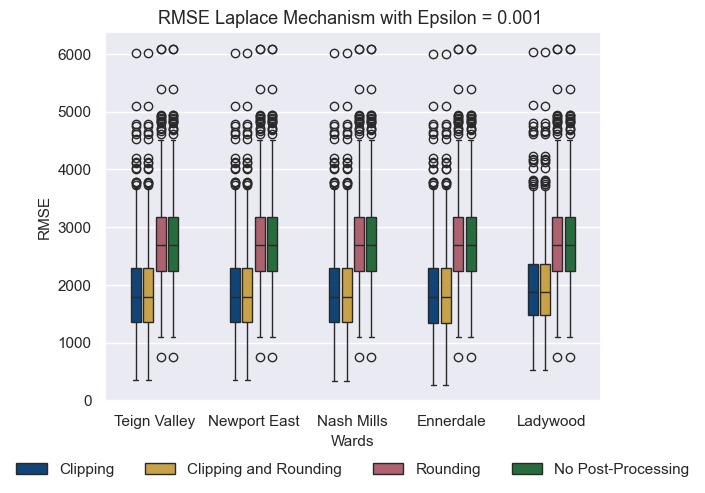

In [94]:
create_plots.create_boxplot_merged_experiments_laplace(
    df_merged_round_clip, "rmse_dp", 0.001, fig_folder_name, colors_4, ncol=4
)

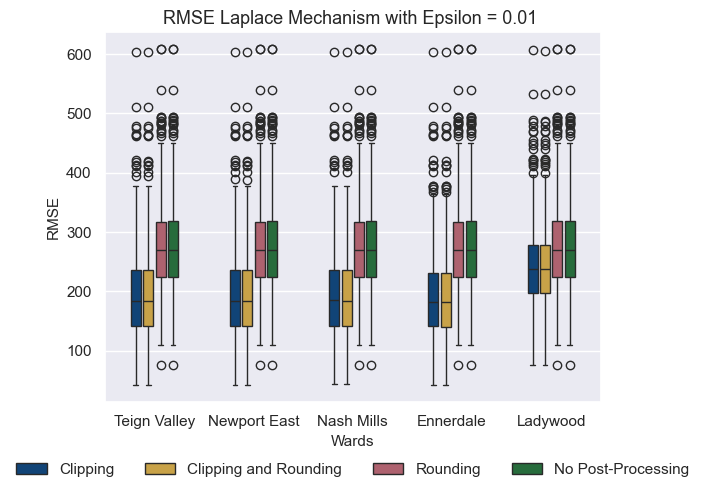

In [95]:
create_plots.create_boxplot_merged_experiments_laplace(
    df_merged_round_clip, "rmse_dp", 0.01, fig_folder_name, colors_4, ncol=4
)

/home/krissi/Documents/Masterarbeit/diff-priv-minory/dp_experiments/create_plots.py:37: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df.query('rmse == @column_name & epsilon == @epsilon'), x='area_name', y='value', hue='postprocessing', palette=colors, width=0.5, gap=0.2)


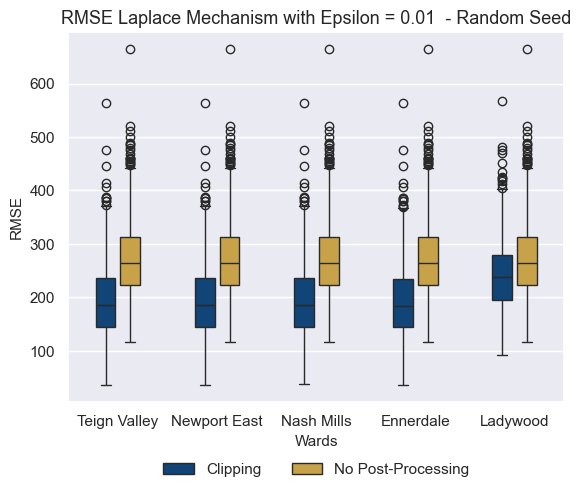

In [96]:
create_plots.create_boxplot_merged_experiments_laplace(
    df_merged_random_seed,
    "rmse_dp",
    0.01,
    fig_folder_name,
    colors_3,
    " - Random Seed",
    "_random_seed",
)

/home/krissi/Documents/Masterarbeit/diff-priv-minory/dp_experiments/create_plots.py:37: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df.query('rmse == @column_name & epsilon == @epsilon'), x='area_name', y='value', hue='postprocessing', palette=colors, width=0.5, gap=0.2)


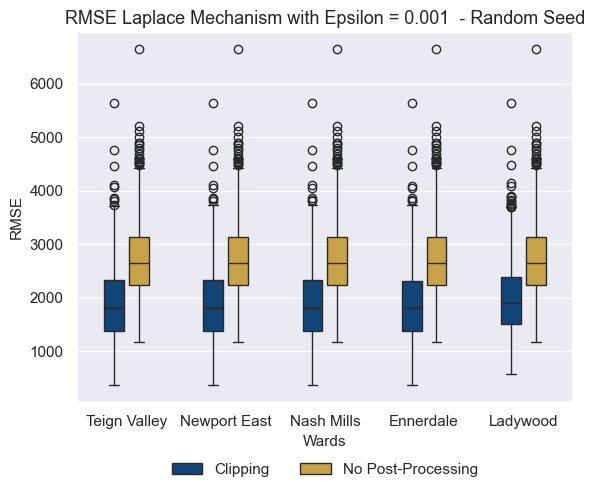

In [97]:
create_plots.create_boxplot_merged_experiments_laplace(
    df_merged_random_seed,
    "rmse_dp",
    0.001,
    fig_folder_name,
    colors_3,
    " - Random Seed",
    "_random_seed",
)

/home/krissi/Documents/Masterarbeit/diff-priv-minory/dp_experiments/create_plots.py:37: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df.query('rmse == @column_name & epsilon == @epsilon'), x='area_name', y='value', hue='postprocessing', palette=colors, width=0.5, gap=0.2)


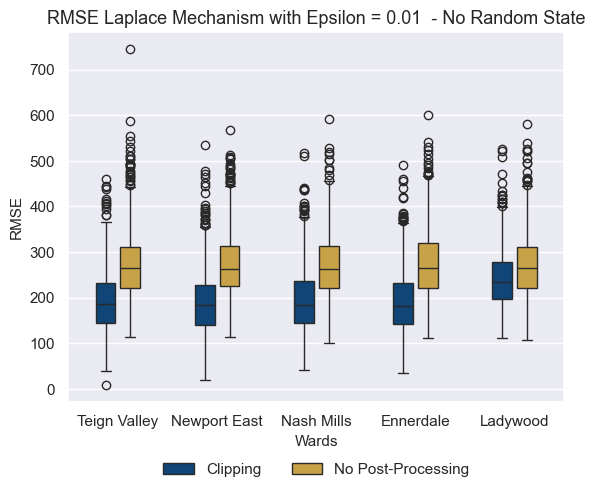

In [98]:
create_plots.create_boxplot_merged_experiments_laplace(
    df_merged_no_rand,
    "rmse_dp",
    0.01,
    fig_folder_name,
    colors_3,
    " - No Random State",
    "_no_rand",
)

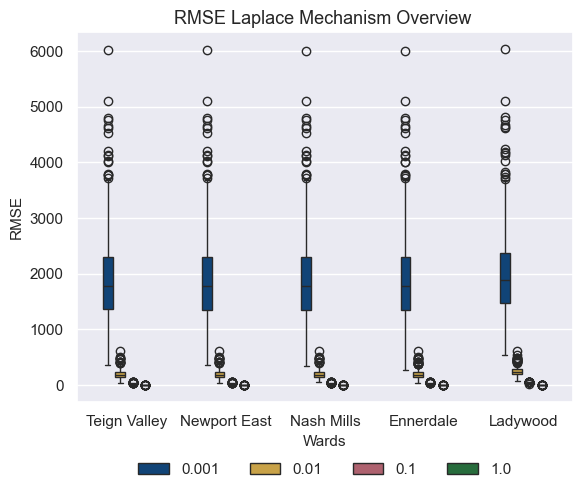

In [99]:
create_plots.create_boxplot_experiments_laplace(
    df_clip, "rmse_dp", fig_folder_name, colors_4
)

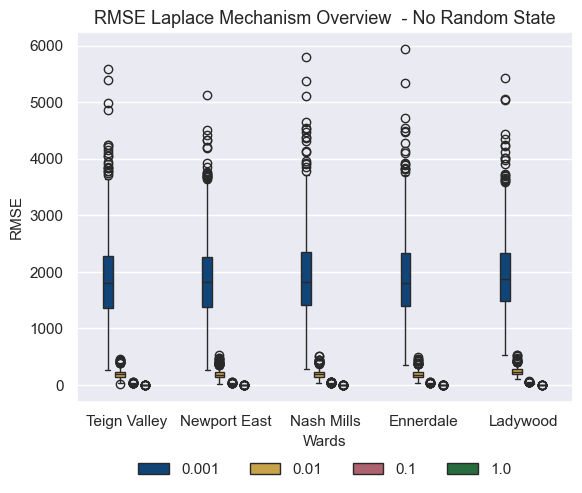

In [100]:
create_plots.create_boxplot_experiments_laplace(
    df_no_rand, "rmse_dp", fig_folder_name, colors_4, " - No Random State", "_no_rand"
)

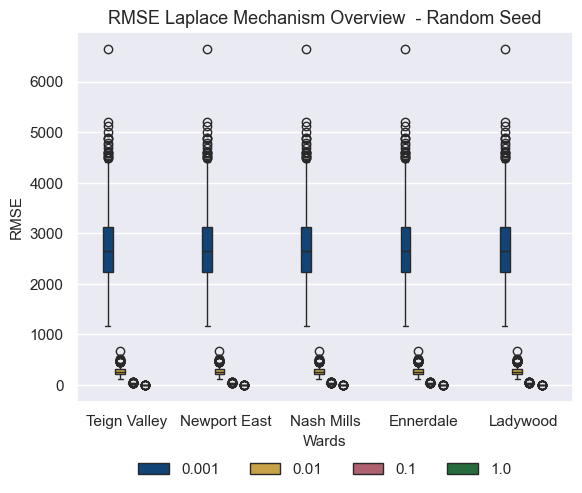

In [101]:
create_plots.create_boxplot_experiments_laplace(
    df_random_seed,
    "rmse_dp",
    fig_folder_name,
    colors_4,
    " - Random Seed",
    "_random_seed",
)